# Problem Statement

A personal loan is an unsecured credit provided by financial institutions based on criteria like employment history, repayment capacity, income level, profession, and credit history. This is also known as a consumer loan or a multi-purpose loan, and it helps the borrower meet any of their immediate needs.
One of the leading bankers in US has approached you to predict on the defaulters with the help of the recent data on the personal loans availed by various customers.
You are now asked to build a robust machine learning model that would distinguish the future applicants who might default and help the bank to take proactive measures.

## Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install termcolor

In [3]:
from termcolor import colored

In [4]:
from IPython.display import display

In [5]:
df_original = pd.read_csv('Data_Train.csv')

In [6]:
df_original.duplicated().sum()

0

In [7]:
df_original.head(10).T

0                    1  \
ID                                 95074               134131   
Asst_Reg                          421802              3964312   
GGGrade                               II                   IV   
Experience                        >10yrs                 7yrs   
Validation                         Vfied      Source Verified   
Yearly Income                   633600.0              85483.2   
Home Status                     MOR??AGE                 REN?   
Unpaid 2 years                         0                    0   
Already Defaulted                      0                    0   
Designation              GLENDALE NISSAN     Business Teacher   
Debt to Income                   12.5496               9.0048   
Postal Code                      91300.0              27400.0   
Lend Amount                     42023.25              38133.0   
Deprecatory Records                    0                    0   
Interest Charged                   15.39                 9.94   
Usage Rate                        88.924              102.856   
Inquiries                              3                    0   
Present Balance                 607161.9            269234.06   
Gross Collection                     0.0                  0.0   
Sub GGGrade                           19                   30   
File Status                   fully paid                whole   
State                         California                   NC   
Account Open                          17                   15   
Total Unpaid CL                  58598.0              18924.0   
Duration                         3 years              5 years   
Unpaid Amount                   31216.05             11660.49   
Reason               debt  consolidation  debt  consolidation   
Claim Type                             I                    I   
Due Fee                              0.0                  0.0   
Loan/No Loan                           0                    0   

                                   2                3                    4  \
ID                             92602            22591               125060   
Asst_Reg                     4247560           197179              4646684   
GGGrade                          III              III                    V   
Experience                      <1yr             <1yr                 2yrs   
Validation           Source Verified            Vfied      Source Verified   
Yearly Income                79200.0          61600.0             68053.92   
Home Status                     REN?             REN?                 REN?   
Unpaid 2 years                     0                0                    0   
Already Defaulted                  0                0                    0   
Designation                   driver         AvePoint          Lead Tester   
Debt to Income               24.9144          16.5816              40.0512   
Postal Code                  32800.0           7000.0              70800.0   
Lend Amount                  17100.0           5130.0              19665.0   
Deprecatory Records                0                0                    0   
Interest Charged               22.35            10.36                13.68   
Usage Rate                    60.372          116.272               127.28   
Inquiries                          0                1                    1   
Present Balance             22476.53         15242.09             65433.94   
Gross Collection                 0.0              0.0                  0.0   
Sub GGGrade                       25               22                   32   
File Status                    whole       fully paid           fully paid   
State                        Florida        NewJersey                   LA   
Account Open                       7                9                   10   
Total Unpaid CL              15604.0          22410.0              36022.0   
Duration                     5 years          3 years              5 year

In [8]:
df_original.shape

(87500, 30)

#  Data Cleaning

* As the customer ID and Postal code may not influence the model, let us drop thsose columns from the dataset.

In [9]:
df=df_original.drop(['ID','Postal Code'],axis=1)

In [10]:
df.head(10).T

0                    1  \
Asst_Reg                          421802              3964312   
GGGrade                               II                   IV   
Experience                        >10yrs                 7yrs   
Validation                         Vfied      Source Verified   
Yearly Income                   633600.0              85483.2   
Home Status                     MOR??AGE                 REN?   
Unpaid 2 years                         0                    0   
Already Defaulted                      0                    0   
Designation              GLENDALE NISSAN     Business Teacher   
Debt to Income                   12.5496               9.0048   
Lend Amount                     42023.25              38133.0   
Deprecatory Records                    0                    0   
Interest Charged                   15.39                 9.94   
Usage Rate                        88.924              102.856   
Inquiries                              3                    0   
Present Balance                 607161.9            269234.06   
Gross Collection                     0.0                  0.0   
Sub GGGrade                           19                   30   
File Status                   fully paid                whole   
State                         California                   NC   
Account Open                          17                   15   
Total Unpaid CL                  58598.0              18924.0   
Duration                         3 years              5 years   
Unpaid Amount                   31216.05             11660.49   
Reason               debt  consolidation  debt  consolidation   
Claim Type                             I                    I   
Due Fee                              0.0                  0.0   
Loan/No Loan                           0                    0   

                                   2                3                    4  \
Asst_Reg                     4247560           197179              4646684   
GGGrade                          III              III                    V   
Experience                      <1yr             <1yr                 2yrs   
Validation           Source Verified            Vfied      Source Verified   
Yearly Income                79200.0          61600.0             68053.92   
Home Status                     REN?             REN?                 REN?   
Unpaid 2 years                     0                0                    0   
Already Defaulted                  0                0                    0   
Designation                   driver         AvePoint          Lead Tester   
Debt to Income               24.9144          16.5816              40.0512   
Lend Amount                  17100.0           5130.0              19665.0   
Deprecatory Records                0                0                    0   
Interest Charged               22.35            10.36                13.68   
Usage Rate                    60.372          116.272               127.28   
Inquiries                          0                1                    1   
Present Balance             22476.53         15242.09             65433.94   
Gross Collection                 0.0              0.0                  0.0   
Sub GGGrade                       25               22                   32   
File Status                    whole       fully paid           fully paid   
State                        Florida        NewJersey                   LA   
Account Open                       7                9                   10   
Total Unpaid CL              15604.0          22410.0              36022.0   
Duration                     5 years          3 years              5 years   
Unpaid Amount                5637.87         15607.17             27472.86   
Reason               major  purchase  major  purchase  debt  consolidation   
Claim Type                         I                I                    I   
Due Fee                          0.0           

In [11]:
df.shape

(87500, 28)

•	There are 87500 records and 28 features in the given dataset

In [12]:
df.columns = [str(x).lower() for x in df.columns]

In [13]:
df.columns = df.columns.str.replace(' ','_')

In [14]:
df.columns = df.columns.str.replace('/','_')

In [15]:
df.columns

Index(['asst_reg', 'gggrade', 'experience', 'validation', 'yearly_income',
       'home_status', 'unpaid_2_years', 'already_defaulted', 'designation',
       'debt_to_income', 'lend_amount', 'deprecatory_records',
       'interest_charged', 'usage_rate', 'inquiries', 'present_balance',
       'gross_collection', 'sub_gggrade', 'file_status', 'state',
       'account_open', 'total_unpaid_cl', 'duration', 'unpaid_amount',
       'reason', 'claim_type', 'due_fee', 'loan_no_loan'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asst_reg             87500 non-null  int64  
 1   gggrade              87500 non-null  object 
 2   experience           87500 non-null  object 
 3   validation           87500 non-null  object 
 4   yearly_income        81925 non-null  float64
 5   home_status          87500 non-null  object 
 6   unpaid_2_years       87500 non-null  int64  
 7   already_defaulted    87500 non-null  int64  
 8   designation          86086 non-null  object 
 9   debt_to_income       84011 non-null  float64
 10  lend_amount          87500 non-null  float64
 11  deprecatory_records  87500 non-null  int64  
 12  interest_charged     87500 non-null  float64
 13  usage_rate           87500 non-null  float64
 14  inquiries            87500 non-null  int64  
 15  present_balance      87500 non-null 

Insights
* All the features are identified with the correct data type.
* There are null values in the given dataset.

In [17]:
df.describe()

asst_reg  yearly_income  unpaid_2_years  already_defaulted  \
count  8.750000e+04   8.192500e+04    87500.000000       87500.000000   
mean   3.798914e+06   1.348596e+05        0.332937           0.005726   
std    2.289038e+06   9.882473e+04        0.876080           0.083505   
min    2.484700e+04   8.800000e+03        0.000000           0.000000   
25%    1.483874e+06   8.324659e+04        0.000000           0.000000   
50%    4.132010e+06   1.144000e+05        0.000000           0.000000   
75%    5.952909e+06   1.601600e+05        0.000000           0.000000   
max    7.351847e+06   8.264031e+06       18.000000           6.000000   

       debt_to_income   lend_amount  deprecatory_records  interest_charged  \
count    84011.000000  87500.000000         87500.000000      87500.000000   
mean        30.942660  25920.535680             0.202400         16.518375   
std         14.079813  14433.837213             0.646414          4.902011   
min          0.000000   1710.000000             0.000000          8.000000   
25%         20.428800  15048.000000             0.000000         12.310000   
50%         30.139200  23940.000000             0.000000         16.490000   
75%         40.908000  34200.000000             0.000000         20.770000   
max        639.290400  59850.000000            86.000000         25.000000   

         usage_rate     inquiries  present_balance  gross_collection  \
count  87500.000000  87500.000000     8.750000e+04      87500.000000   
mean      95.517348      0.670640     2.363895e+05         39.461697   
std       40.554035      0.959572     2.550568e+05        391.919578   
min        0.000000      0.000000     0.000000e+00          0.000000   
25%       66.048000      0.000000     5.173493e+04          0.000000   
50%       97.008000      0.000000     1.388062e+05          0.000000   
75%      126.592000      1.000000     3.534755e+05          0.000000   
max     1534.756000      8.000000     5.629234e+06      26308.470000   

        sub_gggrade  account_open  total_unpaid_cl  unpaid_amount  \
count  87500.000000   87500.00000     8.331400e+04   8.264800e+04   
mean      22.024891      12.77944     5.326864e+04   2.955649e+04   
std        6.452697       5.37116     5.325551e+04   3.745625e+04   
min       11.000000       2.00000     3.320000e+02   0.000000e+00   
25%       17.000000       9.00000     2.324000e+04   1.144674e+04   
50%       21.000000      12.00000     3.967400e+04   2.089278e+04   
75%       26.000000      16.00000     6.640000e+04   3.644908e+04   
max       45.000000      83.00000     1.710630e+06   1.338778e+06   

            due_fee  loan_no_loan  
count  87500.000000  87500.000000  
mean       0.316407      0.188709  
std        3.546087      0.391279  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      169.050000      1.000000

### List of Unique Entries in Each Feature

In [18]:
for i in df.columns:
    print('Feature:',i)
    print('List of Unique Entries:',df[i].unique())
    print('-----------------------------------------------------')

Feature: asst_reg
List of Unique Entries: [ 421802 3964312 4247560 ... 2624710 5966919 6637289]
-----------------------------------------------------
Feature: gggrade
List of Unique Entries: ['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']
-----------------------------------------------------
Feature: experience
List of Unique Entries: ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
-----------------------------------------------------
Feature: validation
List of Unique Entries: ['Vfied' 'Source Verified' 'Not Vfied']
-----------------------------------------------------
Feature: yearly_income
List of Unique Entries: [633600.    85483.2   79200.   ... 510398.24 154191.84  90423.52]
-----------------------------------------------------
Feature: home_status
List of Unique Entries: ['MOR??AGE' 'REN?' 'OWN' 'OTHER' 'NONE']
-----------------------------------------------------
Feature: unpaid_2_years
List of Unique Entries: [ 0  4  2  1  3 11  5  6  7  9 12  8 10 18 16

In [19]:
df.home_status = df.home_status.replace(['MOR??AGE','REN?'],['MORTGAGE','RENT'])

In [20]:
df.home_status.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

### No. of Unique Entries in Each Feature

In [21]:
pd.DataFrame(df.nunique(),columns=['No.of Unique Entries']).rename_axis(index='Features')

No.of Unique Entries
Features                                 
asst_reg                            83966
gggrade                                 7
experience                             11
validation                              3
yearly_income                        6871
home_status                             5
unpaid_2_years                         18
already_defaulted                       7
designation                         40354
debt_to_income                       3964
lend_amount                          1298
deprecatory_records                    18
interest_charged                     1701
usage_rate                           1088
inquiries                               8
present_balance                     73819
gross_collection                     1678
sub_gggrade                            35
file_status                             2
state                                  49
account_open                           59
total_unpaid_cl                      4385
duration                                2
unpaid_amount                       34679
reason                                 13
claim_type                              2
due_fee                               608
loan_no_loan                            2

In [22]:
df.describe().columns

Index(['asst_reg', 'yearly_income', 'unpaid_2_years', 'already_defaulted',
       'debt_to_income', 'lend_amount', 'deprecatory_records',
       'interest_charged', 'usage_rate', 'inquiries', 'present_balance',
       'gross_collection', 'sub_gggrade', 'account_open', 'total_unpaid_cl',
       'unpaid_amount', 'due_fee', 'loan_no_loan'],
      dtype='object')

* Let us prepare two lists namely num (list of all numerical features) & cat (list of all categorical features). It helps us in EDA part.

In [23]:
num = df.describe().columns.drop([ 'unpaid_2_years', 'already_defaulted','deprecatory_records', 'inquiries',
                                  'sub_gggrade', 'account_open','loan_no_loan'])

In [24]:
num

Index(['asst_reg', 'yearly_income', 'debt_to_income', 'lend_amount',
       'interest_charged', 'usage_rate', 'present_balance', 'gross_collection',
       'total_unpaid_cl', 'unpaid_amount', 'due_fee'],
      dtype='object')

In [25]:
cat=df.columns.drop(num)
cat=cat.drop('loan_no_loan')
cat

Index(['gggrade', 'experience', 'validation', 'home_status', 'unpaid_2_years',
       'already_defaulted', 'designation', 'deprecatory_records', 'inquiries',
       'sub_gggrade', 'file_status', 'state', 'account_open', 'duration',
       'reason', 'claim_type'],
      dtype='object')

### Data Description of Numerical Features

In [26]:
df[num].describe().round(1).T

count       mean        std      min        25%  \
asst_reg          87500.0  3798914.1  2289038.1  24847.0  1483874.2   
yearly_income     81925.0   134859.6    98824.7   8800.0    83246.6   
debt_to_income    84011.0       30.9       14.1      0.0       20.4   
lend_amount       87500.0    25920.5    14433.8   1710.0    15048.0   
interest_charged  87500.0       16.5        4.9      8.0       12.3   
usage_rate        87500.0       95.5       40.6      0.0       66.0   
present_balance   87500.0   236389.5   255056.8      0.0    51734.9   
gross_collection  87500.0       39.5      391.9      0.0        0.0   
total_unpaid_cl   83314.0    53268.6    53255.5    332.0    23240.0   
unpaid_amount     82648.0    29556.5    37456.2      0.0    11446.7   
due_fee           87500.0        0.3        3.5      0.0        0.0   

                        50%        75%        max  
asst_reg          4132010.5  5952908.8  7351847.0  
yearly_income      114400.0   160160.0  8264030.7  
debt_to_income         30.1       40.9      639.3  
lend_amount         23940.0    34200.0    59850.0  
interest_charged       16.5       20.8       25.0  
usage_rate             97.0      126.6     1534.8  
present_balance    138806.2   353475.5  5629234.3  
gross_collection        0.0        0.0    26308.5  
total_unpaid_cl     39674.0    66400.0  1710630.0  
unpaid_amount       20892.8    36449.1  1338777.8  
due_fee                 0.0        0.0      169.0

### Data Description of Categorical Features

In [27]:
df[cat].astype('object').describe().T

count unique                  top   freq
gggrade              87500      7                   II  24966
experience           87500     11               >10yrs  30849
validation           87500      3      Source Verified  34504
home_status          87500      5             MORTGAGE  44160
unpaid_2_years       87500     18                    0  69767
already_defaulted    87500      7                    0  87035
designation          86086  40354       School Teacher   1585
deprecatory_records  87500     18                    0  73827
inquiries            87500      8                    0  49853
sub_gggrade          87500     35                   19   5454
file_status          87500      2                whole  46300
state                87500     49           California  12625
account_open         87500     59                   11   7927
duration             87500      2              3 years  60061
reason               87500     13  debt  consolidation  52559
claim_type           87500      2                    I  87454

### Checking Proportion of Classes in Target Variable

In [28]:
df.loan_no_loan.value_counts(normalize=True)*100

0    81.129143
1    18.870857
Name: loan_no_loan, dtype: float64

Note
* The percentage of borrowers who are not defaulting is 81.12% 
* The percentage of borrowers who are defaulting is 18.87% 
* The data is unbalanced with the classes in the target feature but not so bad. As of now, we can proceed with the model building process. 
* Later, if the performance of the model is not up to the mark, we can apply oversampling techniques such as SMOTE for the training dataset to improve the model performance. Or we can change the threshold of probability of default to increase the recall for the default class in target variable.

## Removal of unwanted variables based on Chi-Square test

### Chi-Square Test

In [29]:
from scipy.stats import chi2_contingency

In [30]:
p_values_chi_square=[]
for i in cat:
    chi2, p_value, dof, exp_freq = chi2_contingency(pd.crosstab(index=df[i],columns=df.loan_no_loan), 
                                                correction = False)
    p_values_chi_square.append(p_value)
pd.DataFrame(p_values_chi_square,index=cat,columns=['p_values of Chi Square Test']).round(6)

p_values of Chi Square Test
gggrade                                 0.000000
experience                              0.000000
validation                              0.000000
home_status                             0.000000
unpaid_2_years                          0.000000
already_defaulted                       0.415854
designation                             0.000000
deprecatory_records                     0.000000
inquiries                               0.000000
sub_gggrade                             0.000000
file_status                             0.000000
state                                   0.000000
account_open                            0.000000
duration                                0.000000
reason                                  0.000000
claim_type                              0.001068

Note
* According to the chi-square test, churn is independent of the already-defaulted feature. Hence, it is not important for model building. Let us drop already-defaulted feature from the dataset.

In [31]:
df.drop('already_defaulted',axis=1,inplace=True)

In [32]:
cat = cat.drop('already_defaulted')

In [33]:
cat

Index(['gggrade', 'experience', 'validation', 'home_status', 'unpaid_2_years',
       'designation', 'deprecatory_records', 'inquiries', 'sub_gggrade',
       'file_status', 'state', 'account_open', 'duration', 'reason',
       'claim_type'],
      dtype='object')

# EDA + Insights

## Univariate Analysis

### Histogram and Box Plots for Continous Numerical Variables

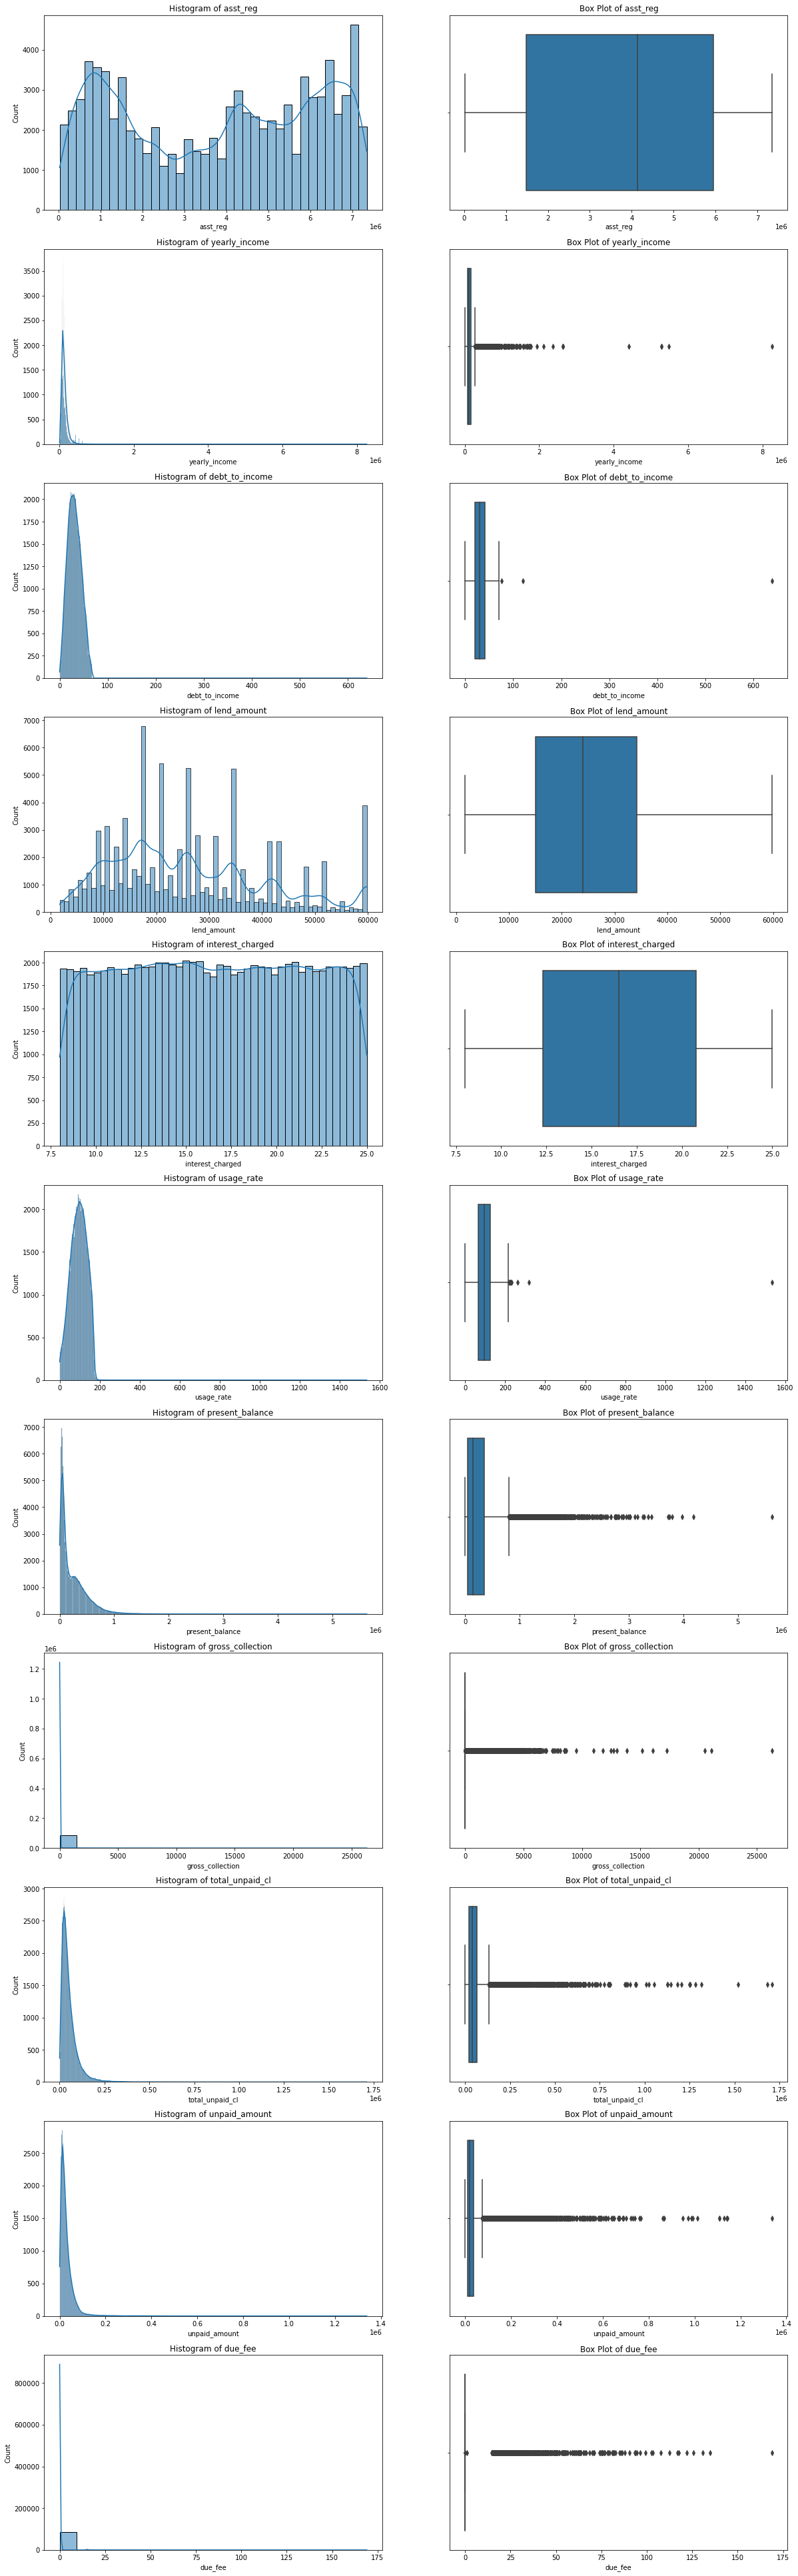

In [34]:
plt.figure(figsize=(20,70))
j=1
for i in num:
    plt.subplot(len(num),2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(len(num),2,k)
    sns.boxplot(df[i]);
    plt.title('Box Plot of '+i)
    j=k+1

### Skewness and Kurtosis

In [35]:
pd.DataFrame([df[num].skew(),df[num].kurtosis()],index=['Skewness','kurtosis']).rename_axis(index='Feature').T.round(2)

Feature           Skewness  kurtosis
asst_reg             -0.09     -1.42
yearly_income        16.87    930.21
debt_to_income        1.17     40.81
lend_amount           0.64     -0.32
interest_charged      0.00     -1.19
usage_rate            0.34     17.37
present_balance       2.44     13.72
gross_collection     19.41    681.53
total_unpaid_cl       5.91     84.67
unpaid_amount         8.87    154.78
due_fee              16.59    381.70

Insights
* Except assets registered, lend amount and interest charged features, all features have outliers.
* Except assets registered, all features have right skewed distributions.

### Count Plots for Categorical Variables

In [36]:
len(cat)

15

In [37]:
cat

Index(['gggrade', 'experience', 'validation', 'home_status', 'unpaid_2_years',
       'designation', 'deprecatory_records', 'inquiries', 'sub_gggrade',
       'file_status', 'state', 'account_open', 'duration', 'reason',
       'claim_type'],
      dtype='object')

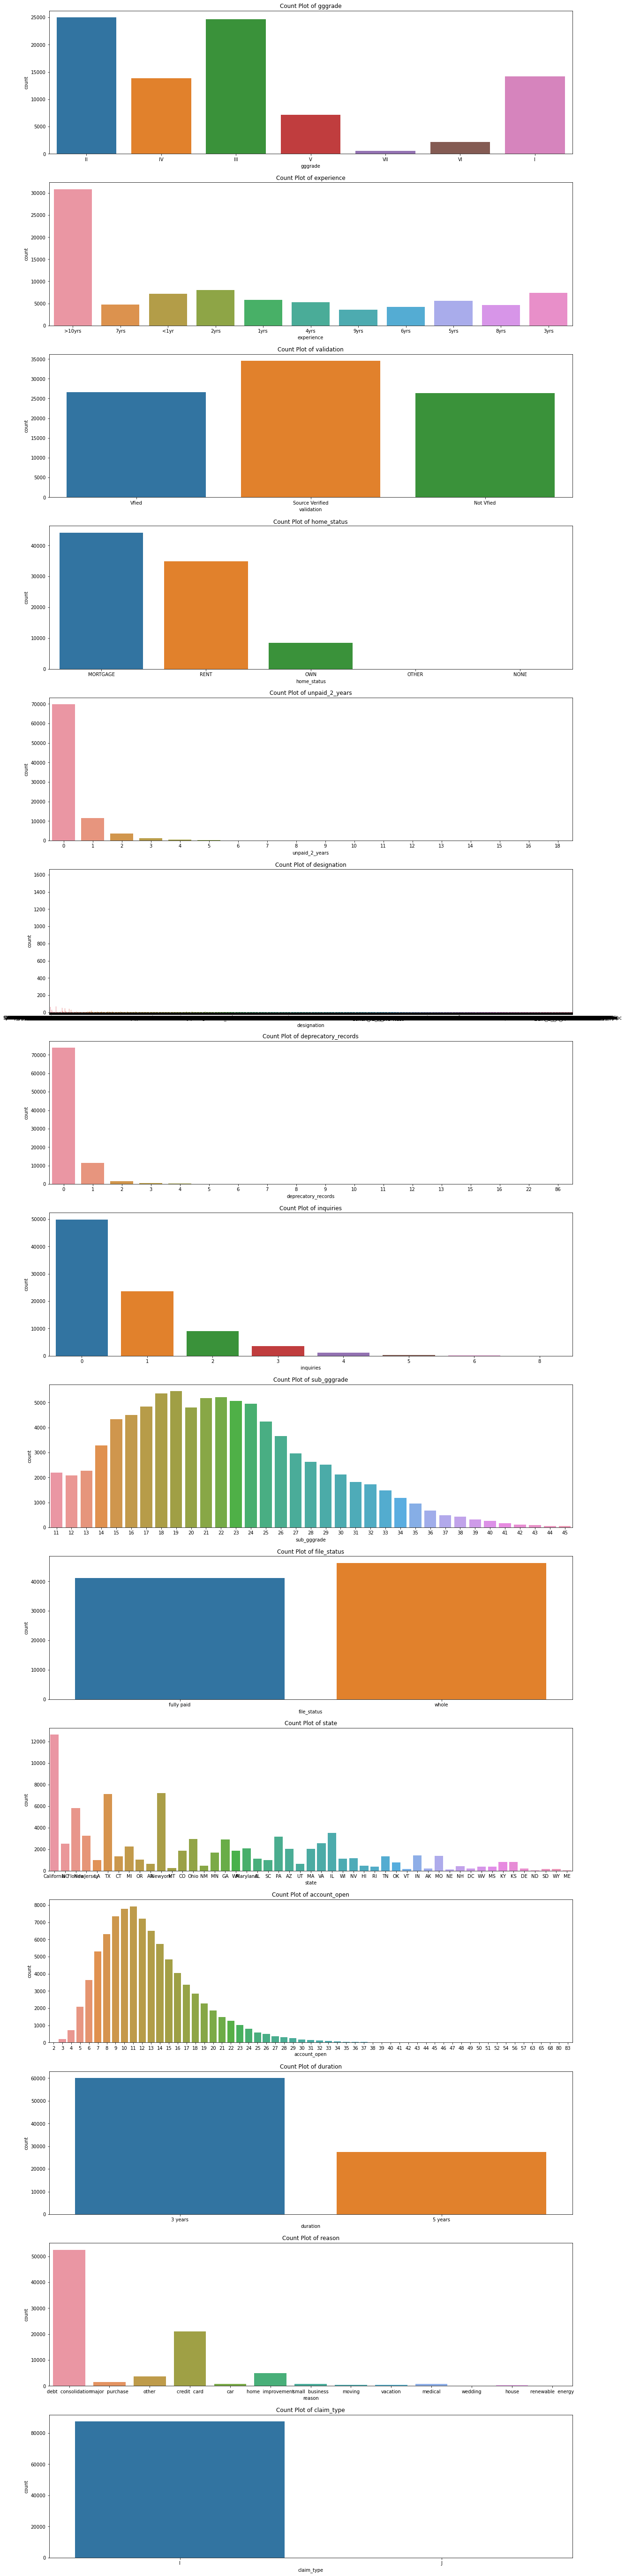

In [52]:
plt.figure(figsize=(20,100))
j=1
for i in cat:
    plt.subplot(15,1,j)
    sns.countplot(df[i]);
    plt.title('Count Plot of '+i)
    j=j+1

### The Distribution of Borrowers in Sub levels of each Categorical Feature

In [38]:
for i in cat:
    print('Feature:',i)
    display(pd.DataFrame(df[i].value_counts()))
    print('-------------------------------')

Feature: gggrade


gggrade
II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498

-------------------------------
Feature: experience


experience
>10yrs       30849
2yrs          8064
3yrs          7350
<1yr          7209
1yrs          5853
5yrs          5623
4yrs          5324
7yrs          4762
8yrs          4604
6yrs          4255
9yrs          3607

-------------------------------
Feature: validation


validation
Source Verified       34504
Vfied                 26642
Not Vfied             26354

-------------------------------
Feature: home_status


home_status
MORTGAGE        44160
RENT            34914
OWN              8416
OTHER               6
NONE                4

-------------------------------
Feature: unpaid_2_years


unpaid_2_years
0            69767
1            11604
2             3658
3             1274
4              565
5              275
6              156
7               67
8               43
9               26
10              22
12              15
11              13
18               4
14               4
13               3
16               2
15               2

-------------------------------
Feature: designation


designation
School Teacher                      1585
Super Lead                          1322
Nurse                                743
RN                                   646
Owner                                623
...                                  ...
B.R. Amon and Sons                     1
Medical record technician              1
Executive Field Assistant              1
Speech language pathologist            1
Outside sales rep                      1

[40354 rows x 1 columns]

-------------------------------
Feature: deprecatory_records


deprecatory_records
0                 73827
1                 11354
2                  1481
3                   465
4                   193
5                    85
6                    39
7                    24
8                    14
10                    7
9                     3
16                    2
12                    1
86                    1
11                    1
13                    1
22                    1
15                    1

-------------------------------
Feature: inquiries


inquiries
0      49853
1      23601
2       9040
3       3537
4       1056
5        315
6         97
8          1

-------------------------------
Feature: sub_gggrade


sub_gggrade
19         5454
18         5363
22         5215
21         5174
23         5063
24         4957
17         4845
20         4808
16         4496
15         4331
25         4243
26         3654
14         3290
27         2961
28         2628
29         2511
13         2271
11         2192
30         2113
12         2087
31         1818
32         1727
33         1477
34         1176
35          956
36          678
37          482
38          437
39          328
40          267
41          177
42          121
43           91
45           58
44           51

-------------------------------
Feature: file_status


file_status
whole             46300
fully paid        41200

-------------------------------
Feature: state


state
California  12625
Newyork      7210
TX           7130
Florida      5813
IL           3502
NewJersey    3253
PA           3169
Ohio         2969
GA           2924
VA           2545
NC           2520
MI           2253
Maryland     2073
AZ           2058
MA           2025
CO           1882
WA           1860
MN           1673
IN           1433
MO           1410
TN           1361
CT           1325
NV           1172
AL           1140
WI           1116
OR           1050
LA           1019
SC           1005
KY            821
KS            819
OK            766
AR            650
UT            639
NM            497
HI            465
NH            427
MS            410
WV            388
RI            372
MT            259
DE            238
DC            235
AK            221
WY            186
SD            181
VT            178
NE            134
ND             50
ME             49

-------------------------------
Feature: account_open


account_open
11          7927
10          7791
9           7331
12          7221
13          6506
8           6301
14          5737
7           5290
15          4845
16          4043
6           3633
17          3370
18          2845
19          2275
5           2095
20          1873
21          1481
22          1255
23          1031
24           796
4            729
25           590
26           491
27           355
28           305
29           260
3            196
30           185
31           154
32           116
33            96
34            76
35            52
36            47
37            41
39            24
38            23
2             18
40            13
43            12
41            12
42            11
49             7
45             7
44             6
46             4
48             4
51             3
50             3
54             3
56             2
52             2
80             1
83             1
63             1
68             1
57             1
65             1
47             1

-------------------------------
Feature: duration


duration
3 years     60061
5 years     27439

-------------------------------
Feature: reason


reason
debt  consolidation   52559
credit  card          21102
home  improvement      4886
other                  3774
major  purchase        1512
medical                 821
small  business         751
car                     710
moving                  503
vacation                424
house                   311
wedding                 109
renewable  energy        38

-------------------------------
Feature: claim_type


claim_type
I       87454
J          46

-------------------------------


Insights
* Home Status-None can be filled with the mode (Mortgage).
* Few sublevels in features like unpaid 2 years, deprecatory records, sub_gggrade, and account_open are having fewer entries, they can be clubbed together.
* Designation and State have so many sublevels. Hence, they are dropped from the analysis.

In [39]:
df.drop(['designation','state'],axis=1,inplace=True)

In [40]:
cat = cat.drop(['designation','state'])

In [41]:
cat

Index(['gggrade', 'experience', 'validation', 'home_status', 'unpaid_2_years',
       'deprecatory_records', 'inquiries', 'sub_gggrade', 'file_status',
       'account_open', 'duration', 'reason', 'claim_type'],
      dtype='object')

## Bivariate analysis

## Count Plots of Categorical Variables with Target as Hue

#### Grant Group Grade vs Target

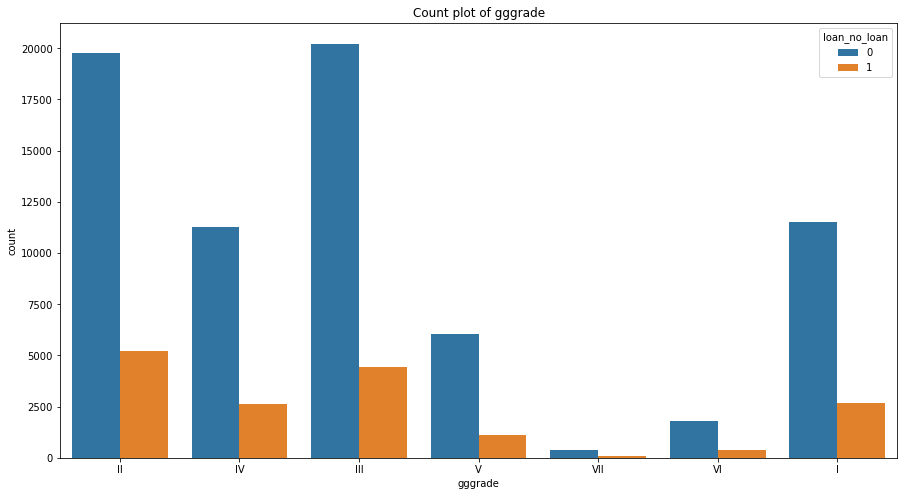

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(df.gggrade,hue=df.loan_no_loan);
plt.title('Count plot of gggrade');

In [58]:
display(pd.crosstab(columns=df.gggrade,index=df.loan_no_loan,normalize=1).round(3)*100)

gggrade          I    II   III    IV     V    VI   VII
loan_no_loan                                          
0             81.2  79.2  82.0  81.2  84.2  82.5  80.1
1             18.8  20.8  18.0  18.8  15.8  17.5  19.9

* Default Rate is not influenced by the gggrade.

#### Experience vs Target

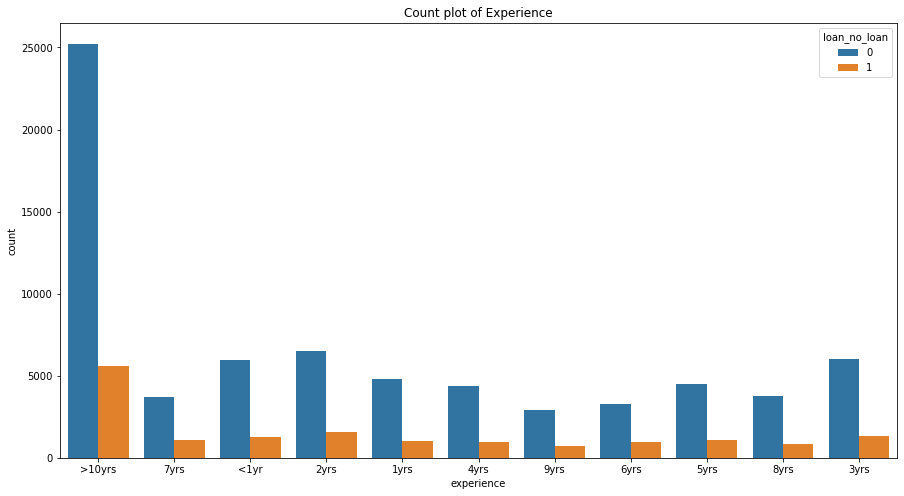

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(df.experience,hue=df.loan_no_loan);
plt.title('Count plot of Experience');

In [60]:
display(pd.crosstab(columns=df.experience,index=df.loan_no_loan,normalize=1).round(3)*100)

experience    1yrs  2yrs  3yrs  4yrs  5yrs  6yrs  7yrs  8yrs  9yrs  <1yr  \
loan_no_loan                                                               
0             82.1  80.7  81.8  81.6  80.5  77.2  77.9  81.4  80.0  82.4   
1             17.9  19.3  18.2  18.4  19.5  22.8  22.1  18.6  20.0  17.6   

experience    >10yrs  
loan_no_loan          
0               81.8  
1               18.2

* There is no clear pattern between the default rate and work experience of borrower.

#### Validation vs Target

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(df.validation,hue=df.loan_no_loan);
plt.title('Count plot of Validation');

In [62]:
display(pd.crosstab(columns=df.validation,index=df.loan_no_loan,normalize=1).round(3)*100)

validation    Not Vfied  Source Verified  Vfied
loan_no_loan                                   
0                  78.3             85.4   78.3
1                  21.7             14.6   21.7

* Default rate of verified and not verified borrowers is more than that of source verified borrowers.

#### Home Status vs Target

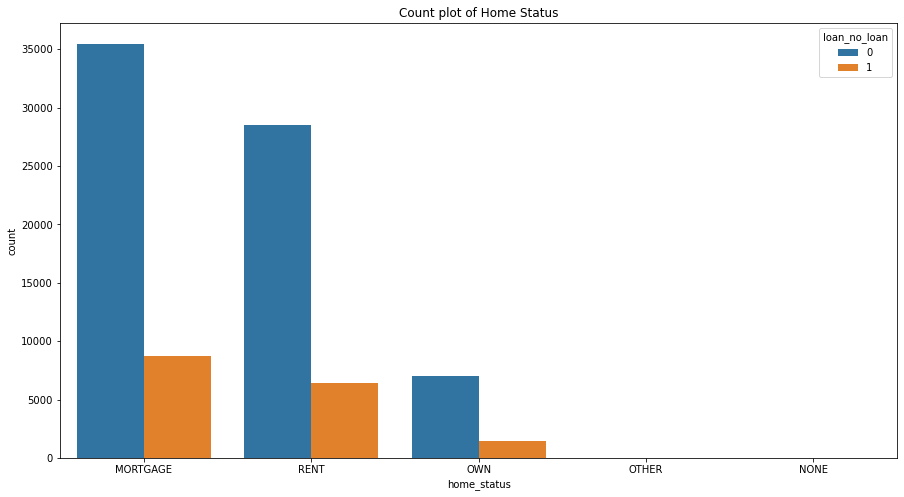

In [46]:
plt.figure(figsize=(15,8))
sns.countplot(df.home_status,hue=df.loan_no_loan);
plt.title('Count plot of Home Status');

In [64]:
display(pd.crosstab(columns=df.home_status,index=df.loan_no_loan,normalize=1).round(3)*100)

home_status   MORTGAGE   NONE  OTHER   OWN  RENT
loan_no_loan                                    
0                 80.3    0.0   33.3  83.1  81.7
1                 19.7  100.0   66.7  16.9  18.3

* Borrowers staying in mortgage homes and other homes are defaulting more than the borrowers having own house. 

#### No.of times the Borrower has defaulted in last two years vs Target

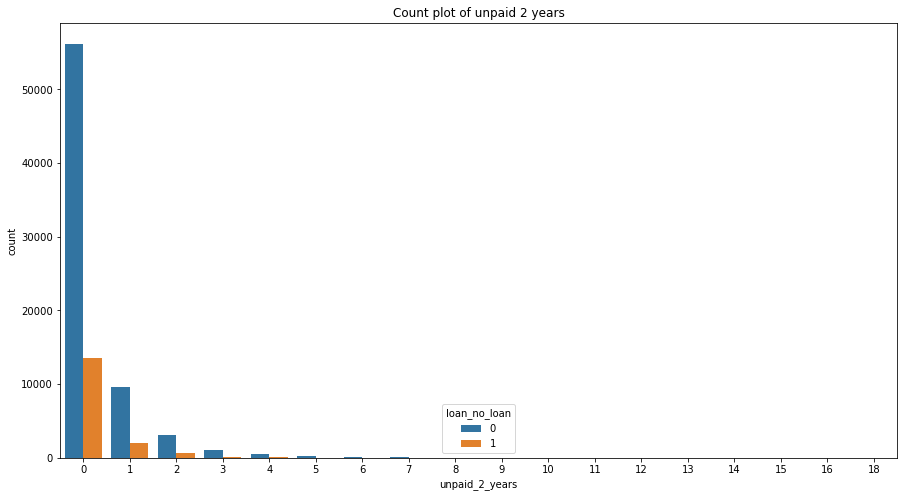

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(df.unpaid_2_years,hue=df.loan_no_loan);
plt.title('Count plot of unpaid 2 years');

In [66]:
display(pd.crosstab(columns=df.unpaid_2_years,index=df.loan_no_loan,normalize=1).round(3)*100)

unpaid_2_years    0     1     2     3     4     5     6     7     8     9   \
loan_no_loan                                                                 
0               80.5  82.9  83.2  85.9  86.2  87.3  89.1  88.1  88.4  92.3   
1               19.5  17.1  16.8  14.1  13.8  12.7  10.9  11.9  11.6   7.7   

unpaid_2_years    10    11    12     13    14     15    16     18  
loan_no_loan                                                       
0               77.3  76.9  86.7  100.0  75.0  100.0  50.0  100.0  
1               22.7  23.1  13.3    0.0  25.0    0.0  50.0    0.0

* There is no clear pattern between the no.of times the Borrower has defaulted in last two years and the default rate.

#### Deprecatory Records vs Target

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(df.deprecatory_records,hue=df.loan_no_loan);
plt.title('Count plot of Deprecatory Records');

In [68]:
display(pd.crosstab(columns=df.deprecatory_records,index=df.loan_no_loan,normalize=1).round(3)*100)

deprecatory_records    0     1     2     3     4     5     6     7      8   \
loan_no_loan                                                                 
0                    80.9  81.2  85.7  87.7  90.2  90.6  94.9  91.7  100.0   
1                    19.1  18.8  14.3  12.3   9.8   9.4   5.1   8.3    0.0   

deprecatory_records     9      10     11     12     13     15     16     22  \
loan_no_loan                                                                  
0                    100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
1                      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

deprecatory_records     86  
loan_no_loan                
0                    100.0  
1                      0.0

* Borrowers having more than 7 deprecatory records have zero default rate.

#### Inquiries vs Target

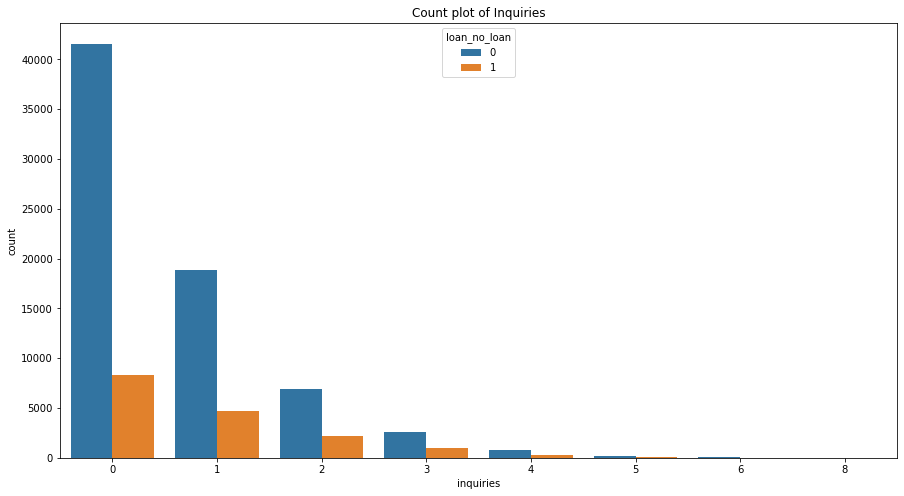

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(df.inquiries,hue=df.loan_no_loan);
plt.title('Count plot of Inquiries');

In [70]:
display(pd.crosstab(columns=df.inquiries,index=df.loan_no_loan,normalize=1).round(3)*100)

inquiries        0     1     2     3     4     5     6      8
loan_no_loan                                                 
0             83.4  79.9  75.9  73.5  75.9  70.2  69.1  100.0
1             16.6  20.1  24.1  26.5  24.1  29.8  30.9    0.0

* Borrowers with high inquires in last 6 months are defaulting more than those with less inquires.

#### Sub Grant Group Grade vs Target

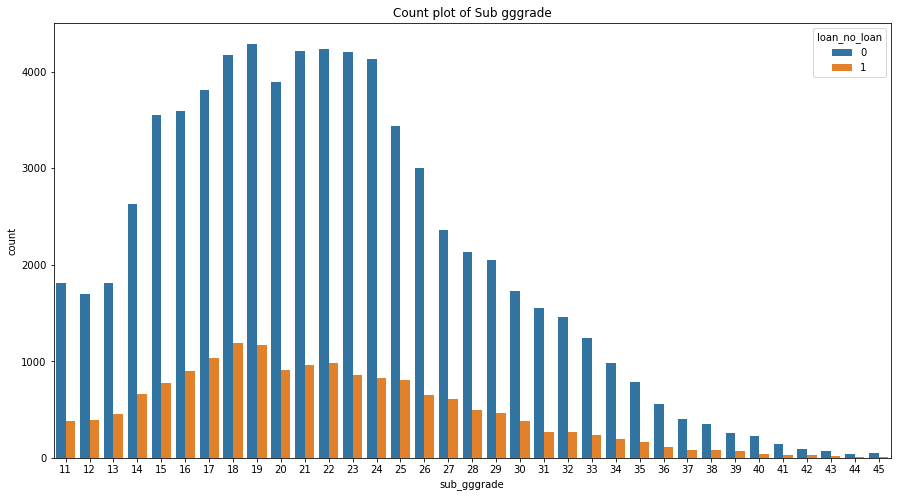

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(df.sub_gggrade,hue=df.loan_no_loan);
plt.title('Count plot of Sub gggrade');

In [72]:
(pd.crosstab(columns=df.sub_gggrade,index=df.loan_no_loan,normalize=1).round(3)*100).T

loan_no_loan     0     1
sub_gggrade             
11            82.8  17.2
12            81.2  18.8
13            80.0  20.0
14            80.0  20.0
15            82.0  18.0
16            79.9  20.1
17            78.6  21.4
18            77.9  22.1
19            78.6  21.4
20            81.0  19.0
21            81.5  18.5
22            81.2  18.8
23            83.1  16.9
24            83.3  16.7
25            81.0  19.0
26            82.1  17.9
27            79.5  20.5
28            81.3  18.7
29            81.5  18.5
30            81.7  18.3
31            85.5  14.5
32            84.5  15.5
33            83.8  16.2
34            83.4  16.6
35            82.7  17.3
36            82.9  17.1
37            83.2  16.8
38            80.8  19.2
39            79.6  20.4
40            86.5  13.5
41            81.4  18.6
42            79.3  20.7
43            79.1  20.9
44            72.5  27.5
45            86.2  13.8

* Default rate is not much influenced by Sub Grant Group Grade.

#### File Status vs Target

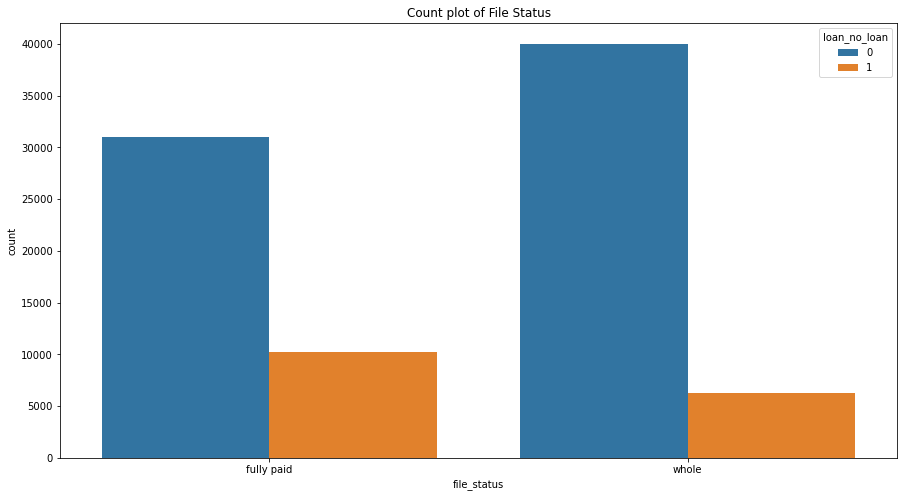

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(df.file_status,hue=df.loan_no_loan);
plt.title('Count plot of File Status');

In [74]:
pd.crosstab(columns=df.file_status,index=df.loan_no_loan,normalize=1).round(3)*100

file_status   fully paid  whole
loan_no_loan                   
0                   75.2   86.4
1                   24.8   13.6

* Borrowers who have paid loan fully are defaulting more than those who paid whole.

#### Total number of open accounts in the name of Borrower vs Target

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(df.account_open,hue=df.loan_no_loan);
plt.title('Count plot of Account Open');

In [76]:
(pd.crosstab(columns=df.account_open,index=df.loan_no_loan,normalize=1).round(3)*100).T

loan_no_loan      0     1
account_open             
2              72.2  27.8
3              79.1  20.9
4              83.3  16.7
5              81.7  18.3
6              81.3  18.7
7              80.2  19.8
8              80.5  19.5
9              80.1  19.9
10             79.6  20.4
11             79.9  20.1
12             80.4  19.6
13             81.3  18.7
14             81.1  18.9
15             80.9  19.1
16             81.5  18.5
17             81.2  18.8
18             83.1  16.9
19             82.0  18.0
20             83.0  17.0
21             83.3  16.7
22             85.1  14.9
23             83.3  16.7
24             84.8  15.2
25             83.6  16.4
26             84.1  15.9
27             85.6  14.4
28             86.2  13.8
29             85.4  14.6
30             88.1  11.9
31             88.3  11.7
32             90.5   9.5
33             86.5  13.5
34             93.4   6.6
35             92.3   7.7
36             85.1  14.9
37            100.0   0.0
38            100.0   0.0
39             95.8   4.2
40             84.6  15.4
41             75.0  25.0
42            100.0   0.0
43            100.0   0.0
44            100.0   0.0
45            100.0   0.0
46            100.0   0.0
47            100.0   0.0
48             50.0  50.0
49             71.4  28.6
50             66.7  33.3
51            100.0   0.0
52            100.0   0.0
54            100.0   0.0
56            100.0   0.0
57            100.0   0.0
63            100.0   0.0
65            100.0   0.0
68            100.0   0.0
80            100.0   0.0
83            100.0   0.0

* Borrowers with less number of accounts opened are defaulting more than those with high accounts opened.

#### Duration vs Target

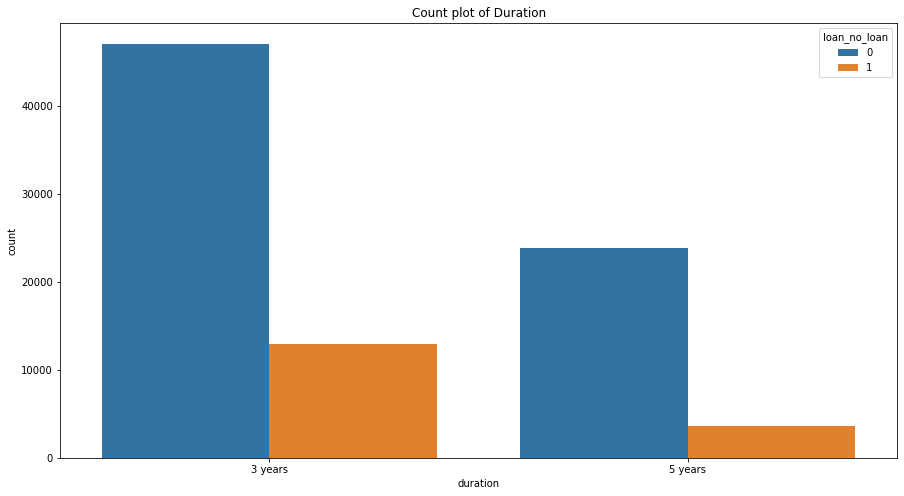

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(df.duration,hue=df.loan_no_loan);
plt.title('Count plot of Duration');

In [78]:
pd.crosstab(columns=df.duration,index=df.loan_no_loan,normalize=1).round(3)*100

duration      3 years  5 years
loan_no_loan                  
0                78.4     87.0
1                21.6     13.0

* Borrowers with 3 years duration are defaulting more than those with 5 years duration.

#### Reason vs Target

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(df.reason,hue=df.loan_no_loan);
plt.title('Count plot of Reason');

In [80]:
pd.crosstab(columns=df.reason,index=df.loan_no_loan,normalize=1).round(3)*100

reason         car  credit  card  debt  consolidation  home  improvement  \
loan_no_loan                                                               
0             77.5          82.8                 80.7               80.4   
1             22.5          17.2                 19.3               19.6   

reason        house  major  purchase  medical  moving  other  \
loan_no_loan                                                   
0              69.1             80.8     80.4    81.1   82.2   
1              30.9             19.2     19.6    18.9   17.8   

reason        renewable  energy  small  business  vacation  wedding  
loan_no_loan                                                         
0                          63.2             80.7      82.5     40.4  
1                          36.8             19.3      17.5     59.6

* Borrowers who have taken loans for wedding, renewable energy, house and car purpose are defaulting more than other borrowers.

#### Claim Type vs Target

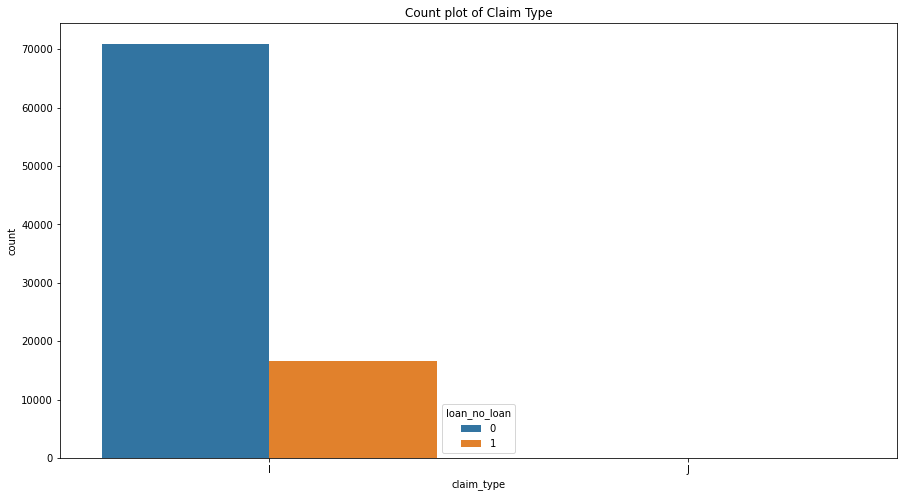

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(df.claim_type,hue=df.loan_no_loan);
plt.title('Count plot of Claim Type');

In [82]:
pd.crosstab(columns=df.claim_type,index=df.loan_no_loan,normalize=1).round(3)*100

claim_type       I      J
loan_no_loan             
0             81.1  100.0
1             18.9    0.0

* Borrowers who have taken loan with joint account type are defaulting at all.

## Numerical Variables Vs Target

### Box Plots and KDE Plots of Numerical Variables with Target as Hue

In [83]:
len(num)

11

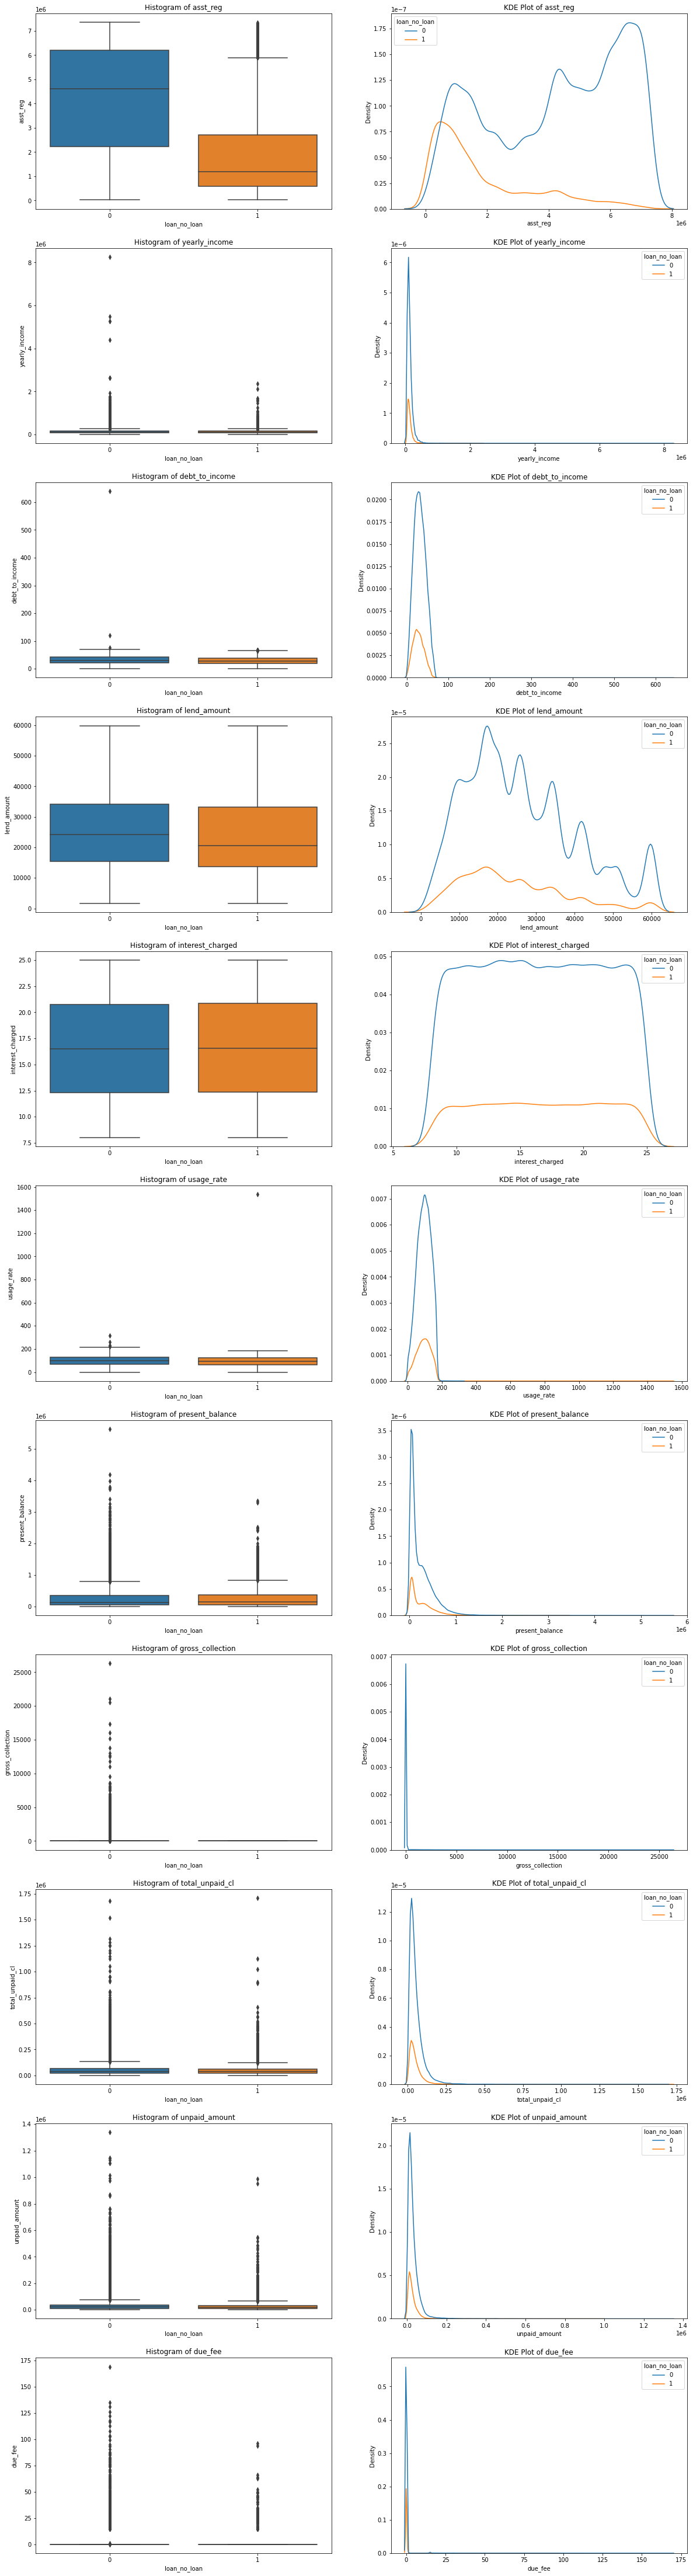

In [56]:
plt.figure(figsize=(20,80))
j=1
for i in num:
    plt.subplot(len(num),2,j)
    sns.boxplot(x=df.loan_no_loan, y=df[i]);
    plt.title('Histogram of '+i)
    k=j+1
    plt.subplot(len(num),2,k)
    sns.kdeplot(x=df[i],hue=df.loan_no_loan);
    plt.title('KDE Plot of '+i)
    j=k+1

In [57]:
df.groupby('loan_no_loan').median()[num]

asst_reg  yearly_income  debt_to_income  lend_amount  \
loan_no_loan                                                          
0             4619741.0       114400.0         30.7776      24282.0   
1             1194471.0       114400.0         27.4680      20520.0   

              interest_charged  usage_rate  present_balance  gross_collection  \
loan_no_loan                                                                    
0                        16.48      97.524       136044.045               0.0   
1                        16.56      94.600       152425.075               0.0   

              total_unpaid_cl  unpaid_amount  due_fee  
loan_no_loan                                           
0                     39840.0       21255.30      0.0  
1                     38346.0       19437.57      0.0

In [58]:
df[df.gross_collection==0]['loan_no_loan'].value_counts()

0    69303
1    16512
Name: loan_no_loan, dtype: int64

In [59]:
df[df.gross_collection>0]['loan_no_loan'].value_counts()

0    1685
Name: loan_no_loan, dtype: int64

In [60]:
df[df.due_fee==0]['loan_no_loan'].value_counts(normalize=True)

0    0.810475
1    0.189525
Name: loan_no_loan, dtype: float64

In [61]:
df[df.due_fee>0]['loan_no_loan'].value_counts(normalize=True)

0    0.88271
1    0.11729
Name: loan_no_loan, dtype: float64

Insights
* 75th percentile of assets registered for defaulted borrowers is less than 30th percentile of assets registered for non defaulted borrowers.
* Median lend amount of defaulted borrowers is less than that of non defaulted borrowers.
* All the borrowers who have gross collection more than zero are not defaulting.
* Borrowers with zero due fee are defaulting more than those with high due fee.
* Box plots of yearly income, debt to income ratio, interest charged, usage rate, present balance, total unpaid dues of other loans, unpaid amount of credit card are almost similar to both defaulted borrowes and non-defaulted borrowes.

### Pair Plot - Scatter Plots of Numerical Variables with Target as Hue

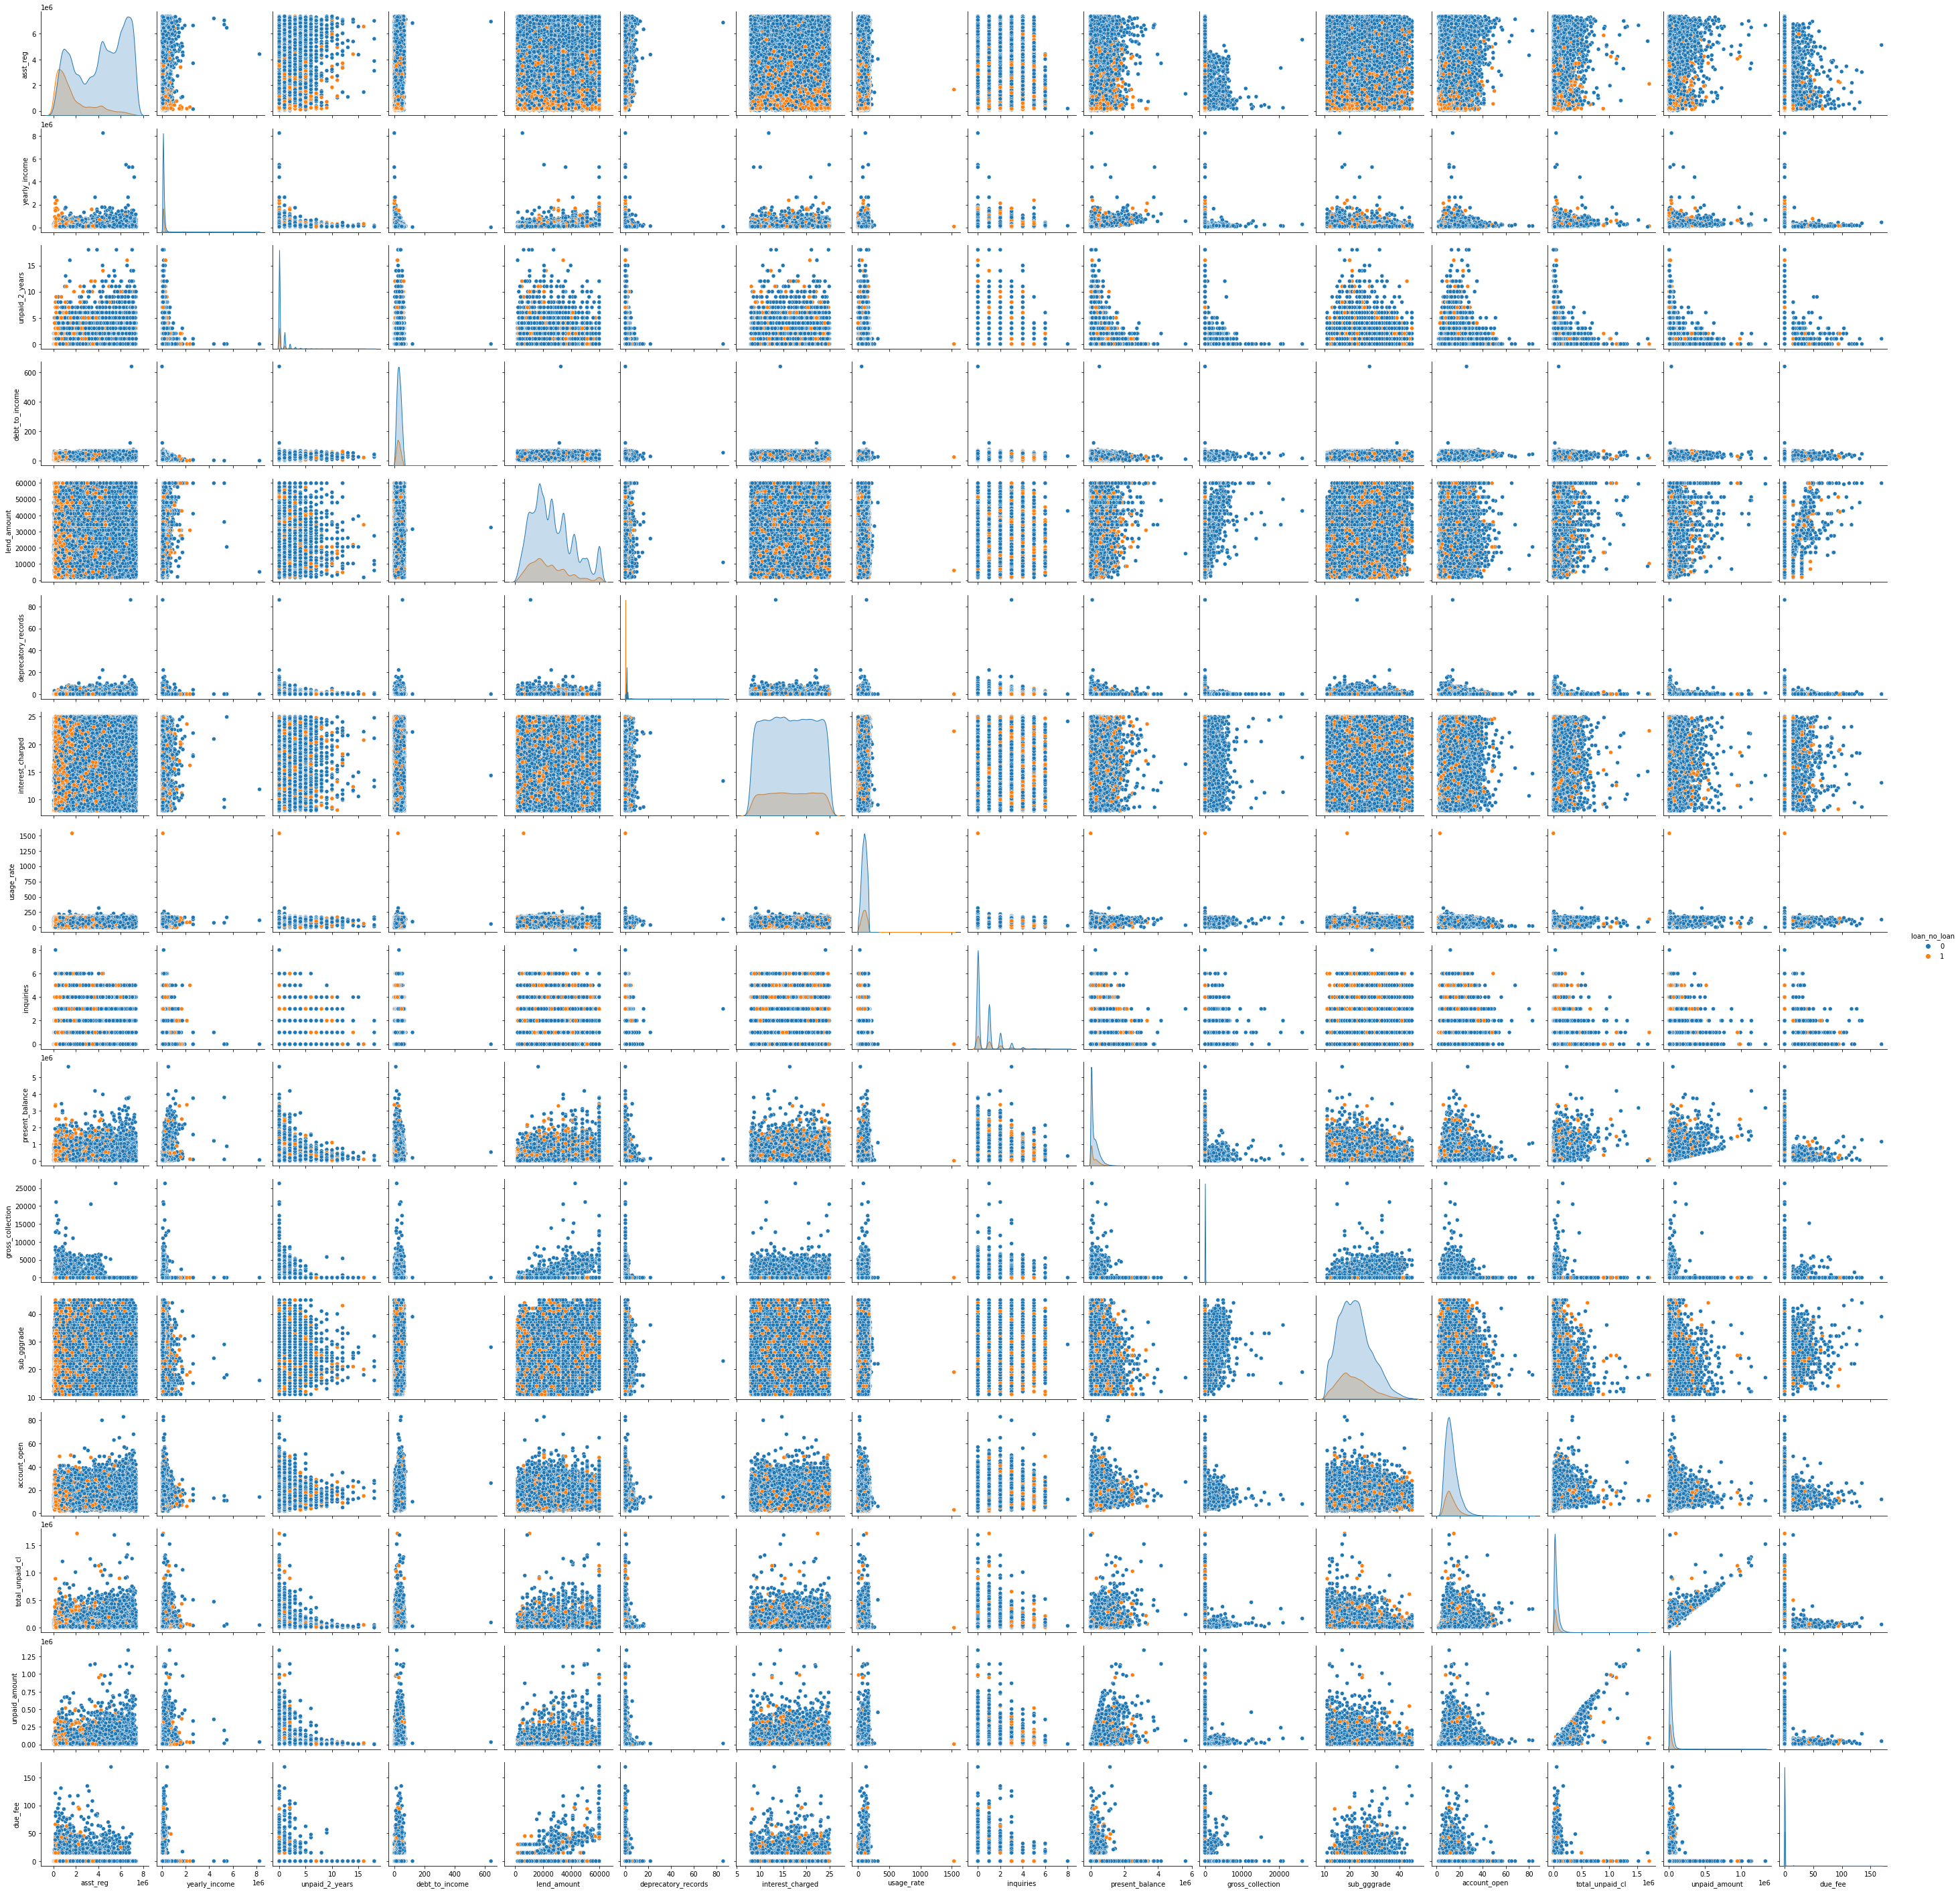

In [94]:
sns.pairplot(df,hue='loan_no_loan');

In [91]:
df[num].corr().round(2)

asst_reg  yearly_income  debt_to_income  lend_amount  \
asst_reg              1.00           0.04            0.09         0.04   
yearly_income         0.04           1.00           -0.22         0.38   
debt_to_income        0.09          -0.22            1.00         0.03   
lend_amount           0.04           0.38            0.03         1.00   
interest_charged     -0.00           0.00           -0.00        -0.00   
usage_rate           -0.07           0.05            0.16         0.12   
present_balance       0.01           0.48           -0.01         0.32   
gross_collection     -0.11           0.01            0.01         0.07   
total_unpaid_cl       0.06           0.34            0.08         0.36   
unpaid_amount         0.03           0.35            0.14         0.34   
due_fee              -0.06           0.01           -0.00         0.04   

                  interest_charged  usage_rate  present_balance  \
asst_reg                     -0.00       -0.07             0.01   
yearly_income                 0.00        0.05             0.48   
debt_to_income               -0.00        0.16            -0.01   
lend_amount                  -0.00        0.12             0.32   
interest_charged              1.00       -0.00            -0.00   
usage_rate                   -0.00        1.00             0.08   
present_balance              -0.00        0.08             1.00   
gross_collection             -0.00        0.03             0.00   
total_unpaid_cl               0.01       -0.13             0.41   
unpaid_amount                 0.00        0.22             0.43   
due_fee                      -0.00        0.02             0.01   

                  gross_collection  total_unpaid_cl  unpaid_amount  due_fee  
asst_reg                     -0.11             0.06           0.03    -0.06  
yearly_income                 0.01             0.34           0.35     0.01  
debt_to_income                0.01             0.08           0.14    -0.00  
lend_amount                   0.07             0.36           0.34     0.04  
interest_charged             -0.00             0.01           0.00    -0.00  
usage_rate                    0.03            -0.13           0.22     0.02  
present_balance               0.00             0.41           0.43     0.01  
gross_collection              1.00             0.00           0.01     0.06  
total_unpaid_cl               0.00             1.00           0.83    -0.01  
unpaid_amount                 0.01             0.83           1.00    -0.00  
due_fee                       0.06            -0.01          -0.00     1.00

### Heat Map of Correlations

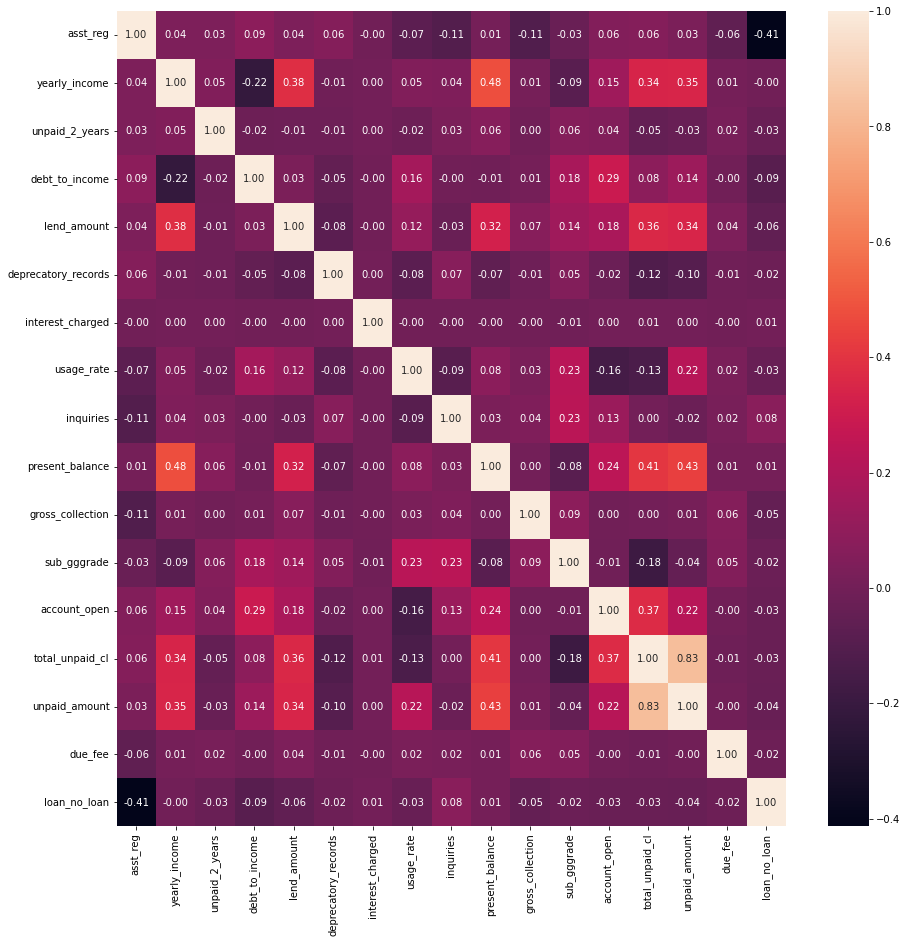

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

Insights
* Total unpaid CL and Unpaid amount are highly correlated.
* There is no significant correlations between the other independent variables

# Feature Engineering

### Let us reduce the sublevels in each feature by merging the subevels with similar default rate.

#### Grant Group Grade

In [106]:
display(pd.crosstab(columns=df.gggrade,index=df.loan_no_loan,normalize=1).round(3)*100)

gggrade          I    II   III    IV     V    VI   VII
loan_no_loan                                          
0             81.2  79.2  82.0  81.2  84.2  82.5  80.1
1             18.8  20.8  18.0  18.8  15.8  17.5  19.9

In [107]:
df.gggrade.value_counts()

II     24966
III    24652
I      14171
IV     13867
V       7154
VI      2192
VII      498
Name: gggrade, dtype: int64

In [108]:
df.gggrade = df.gggrade.replace([ 'I','II', 'III', 'IV'],[0,1,2,3])
df.gggrade = df.gggrade.replace(['V', 'VI', 'VII'],4)

In [109]:
df.gggrade.value_counts()

1    24966
2    24652
0    14171
3    13867
4     9844
Name: gggrade, dtype: int64

#### Experience

In [110]:
display(pd.crosstab(columns=df.experience,index=df.loan_no_loan,normalize=1).round(3)*100)

experience    1yrs  2yrs  3yrs  4yrs  5yrs  6yrs  7yrs  8yrs  9yrs  <1yr  \
loan_no_loan                                                               
0             82.1  80.7  81.8  81.6  80.5  77.2  77.9  81.4  80.0  82.4   
1             17.9  19.3  18.2  18.4  19.5  22.8  22.1  18.6  20.0  17.6   

experience    >10yrs  
loan_no_loan          
0               81.8  
1               18.2

In [111]:
df.experience.value_counts()

>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: experience, dtype: int64

In [112]:
df.experience = df.experience.replace('<1yr',0)
df.experience = df.experience.replace(['1yrs', '2yrs', '3yrs', '4yrs','5yrs'],1)
df.experience = df.experience.replace(['6yrs', '7yrs',  '8yrs', '9yrs'],2)
df.experience = df.experience.replace('>10yrs',3)

In [113]:
df.experience.value_counts()

1    32214
3    30849
2    17228
0     7209
Name: experience, dtype: int64

#### Validation

In [114]:
display(pd.crosstab(columns=df.validation,index=df.loan_no_loan,normalize=1).round(3)*100)

validation    Not Vfied  Source Verified  Vfied
loan_no_loan                                   
0                  78.3             85.4   78.3
1                  21.7             14.6   21.7

In [115]:
df.validation.value_counts()

Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: validation, dtype: int64

In [116]:
df.validation = df.validation.replace(['Vfied', 'Source Verified', 'Not Vfied'],[2,1,0])

In [117]:
df.validation.value_counts()

1    34504
2    26642
0    26354
Name: validation, dtype: int64

#### Home Status

In [118]:
display(pd.crosstab(columns=df.home_status,index=df.loan_no_loan,normalize=1).round(3)*100)

home_status   MORTGAGE   NONE  OTHER   OWN  RENT
loan_no_loan                                    
0                 80.3    0.0   33.3  83.1  81.7
1                 19.7  100.0   66.7  16.9  18.3

In [119]:
df.home_status = np.where(df.home_status=='NONE','MOR??AGE',df.home_status)

In [120]:
df.home_status.value_counts()

MORTGAGE    44160
RENT        34914
OWN          8416
OTHER           6
MOR??AGE        4
Name: home_status, dtype: int64

#### No.of times the Borrower has defaulted in last two years

In [121]:
display(pd.crosstab(columns=df.unpaid_2_years,index=df.loan_no_loan,normalize=1).round(3)*100)

unpaid_2_years    0     1     2     3     4     5     6     7     8     9   \
loan_no_loan                                                                 
0               80.5  82.9  83.2  85.9  86.2  87.3  89.1  88.1  88.4  92.3   
1               19.5  17.1  16.8  14.1  13.8  12.7  10.9  11.9  11.6   7.7   

unpaid_2_years    10    11    12     13    14     15    16     18  
loan_no_loan                                                       
0               77.3  76.9  86.7  100.0  75.0  100.0  50.0  100.0  
1               22.7  23.1  13.3    0.0  25.0    0.0  50.0    0.0

In [122]:
df.unpaid_2_years.value_counts()

0     69767
1     11604
2      3658
3      1274
4       565
5       275
6       156
7        67
8        43
9        26
10       22
12       15
11       13
18        4
14        4
13        3
16        2
15        2
Name: unpaid_2_years, dtype: int64

In [123]:
df.unpaid_2_years = np.where(df.unpaid_2_years>0,1,df.unpaid_2_years)

In [124]:
df.unpaid_2_years.value_counts()

0    69767
1    17733
Name: unpaid_2_years, dtype: int64

#### Deprecatory Records

In [125]:
display(pd.crosstab(columns=df.deprecatory_records,index=df.loan_no_loan,normalize=1).round(3)*100)

deprecatory_records    0     1     2     3     4     5     6     7      8   \
loan_no_loan                                                                 
0                    80.9  81.2  85.7  87.7  90.2  90.6  94.9  91.7  100.0   
1                    19.1  18.8  14.3  12.3   9.8   9.4   5.1   8.3    0.0   

deprecatory_records     9      10     11     12     13     15     16     22  \
loan_no_loan                                                                  
0                    100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
1                      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

deprecatory_records     86  
loan_no_loan                
0                    100.0  
1                      0.0

In [126]:
df.deprecatory_records.value_counts()

0     73827
1     11354
2      1481
3       465
4       193
5        85
6        39
7        24
8        14
10        7
9         3
16        2
12        1
86        1
11        1
13        1
22        1
15        1
Name: deprecatory_records, dtype: int64

In [127]:
df.deprecatory_records = df.deprecatory_records.replace([4,5,6,7],4)
df.deprecatory_records = np.where(df.deprecatory_records>7,5,df.deprecatory_records)

In [128]:
df.deprecatory_records.value_counts()

0    73827
1    11354
2     1481
3      465
4      341
5       32
Name: deprecatory_records, dtype: int64

#### Inquiries

In [129]:
display(pd.crosstab(columns=df.inquiries,index=df.loan_no_loan,normalize=1).round(3)*100)

inquiries        0     1     2     3     4     5     6      8
loan_no_loan                                                 
0             83.4  79.9  75.9  73.5  75.9  70.2  69.1  100.0
1             16.6  20.1  24.1  26.5  24.1  29.8  30.9    0.0

In [130]:
df.inquiries.value_counts()

0    49853
1    23601
2     9040
3     3537
4     1056
5      315
6       97
8        1
Name: inquiries, dtype: int64

In [131]:
df.inquiries = df.inquiries.replace([2,3,4],2)
df.inquiries = np.where(df.inquiries>4,3,df.inquiries)

In [132]:
df.inquiries.value_counts()

0    49853
1    23601
2    13633
3      413
Name: inquiries, dtype: int64

#### Sub Grant Group Grade

In [133]:
(pd.crosstab(columns=df.sub_gggrade,index=df.loan_no_loan,normalize=1).round(3)*100).T

loan_no_loan     0     1
sub_gggrade             
11            82.8  17.2
12            81.2  18.8
13            80.0  20.0
14            80.0  20.0
15            82.0  18.0
16            79.9  20.1
17            78.6  21.4
18            77.9  22.1
19            78.6  21.4
20            81.0  19.0
21            81.5  18.5
22            81.2  18.8
23            83.1  16.9
24            83.3  16.7
25            81.0  19.0
26            82.1  17.9
27            79.5  20.5
28            81.3  18.7
29            81.5  18.5
30            81.7  18.3
31            85.5  14.5
32            84.5  15.5
33            83.8  16.2
34            83.4  16.6
35            82.7  17.3
36            82.9  17.1
37            83.2  16.8
38            80.8  19.2
39            79.6  20.4
40            86.5  13.5
41            81.4  18.6
42            79.3  20.7
43            79.1  20.9
44            72.5  27.5
45            86.2  13.8

In [134]:
df.sub_gggrade.value_counts().sort_index()

11    2192
12    2087
13    2271
14    3290
15    4331
16    4496
17    4845
18    5363
19    5454
20    4808
21    5174
22    5215
23    5063
24    4957
25    4243
26    3654
27    2961
28    2628
29    2511
30    2113
31    1818
32    1727
33    1477
34    1176
35     956
36     678
37     482
38     437
39     328
40     267
41     177
42     121
43      91
44      51
45      58
Name: sub_gggrade, dtype: int64

In [135]:
df.sub_gggrade = np.where(df.sub_gggrade<21,0,df.sub_gggrade)
df.sub_gggrade = np.where((df.sub_gggrade>20)&(df.sub_gggrade<31),1,df.sub_gggrade)
df.sub_gggrade = np.where(df.sub_gggrade>30,2,df.sub_gggrade)

In [136]:
df.sub_gggrade.value_counts()

0    39137
1    38519
2     9844
Name: sub_gggrade, dtype: int64

#### File Status

In [137]:
pd.crosstab(columns=df.file_status,index=df.loan_no_loan,normalize=1).round(3)*100

file_status   fully paid  whole
loan_no_loan                   
0                   75.2   86.4
1                   24.8   13.6

#### Total number of open accounts in the name of Borrower

In [138]:
(pd.crosstab(columns=df.account_open,index=df.loan_no_loan,normalize=1).round(3)*100).T

loan_no_loan      0     1
account_open             
2              72.2  27.8
3              79.1  20.9
4              83.3  16.7
5              81.7  18.3
6              81.3  18.7
7              80.2  19.8
8              80.5  19.5
9              80.1  19.9
10             79.6  20.4
11             79.9  20.1
12             80.4  19.6
13             81.3  18.7
14             81.1  18.9
15             80.9  19.1
16             81.5  18.5
17             81.2  18.8
18             83.1  16.9
19             82.0  18.0
20             83.0  17.0
21             83.3  16.7
22             85.1  14.9
23             83.3  16.7
24             84.8  15.2
25             83.6  16.4
26             84.1  15.9
27             85.6  14.4
28             86.2  13.8
29             85.4  14.6
30             88.1  11.9
31             88.3  11.7
32             90.5   9.5
33             86.5  13.5
34             93.4   6.6
35             92.3   7.7
36             85.1  14.9
37            100.0   0.0
38            100.0   0.0
39             95.8   4.2
40             84.6  15.4
41             75.0  25.0
42            100.0   0.0
43            100.0   0.0
44            100.0   0.0
45            100.0   0.0
46            100.0   0.0
47            100.0   0.0
48             50.0  50.0
49             71.4  28.6
50             66.7  33.3
51            100.0   0.0
52            100.0   0.0
54            100.0   0.0
56            100.0   0.0
57            100.0   0.0
63            100.0   0.0
65            100.0   0.0
68            100.0   0.0
80            100.0   0.0
83            100.0   0.0

In [139]:
df.account_open.value_counts().sort_index()

2       18
3      196
4      729
5     2095
6     3633
7     5290
8     6301
9     7331
10    7791
11    7927
12    7221
13    6506
14    5737
15    4845
16    4043
17    3370
18    2845
19    2275
20    1873
21    1481
22    1255
23    1031
24     796
25     590
26     491
27     355
28     305
29     260
30     185
31     154
32     116
33      96
34      76
35      52
36      47
37      41
38      23
39      24
40      13
41      12
42      11
43      12
44       6
45       7
46       4
47       1
48       4
49       7
50       3
51       3
52       2
54       3
56       2
57       1
63       1
65       1
68       1
80       1
83       1
Name: account_open, dtype: int64

In [140]:
df.account_open = np.where(df.account_open<21,0,df.account_open)
df.account_open = np.where((df.account_open>20)&(df.account_open<37),1,df.account_open)
df.account_open = np.where(df.account_open>36,2,df.account_open)

In [141]:
df.account_open.value_counts()

0    80026
1     7290
2      184
Name: account_open, dtype: int64

#### Duration

In [142]:
pd.crosstab(columns=df.duration,index=df.loan_no_loan,normalize=1).round(3)*100

duration      3 years  5 years
loan_no_loan                  
0                78.4     87.0
1                21.6     13.0

In [143]:
df.duration.value_counts()

3 years    60061
5 years    27439
Name: duration, dtype: int64

In [144]:
df.duration = df.duration.replace(['3 years', '5 years'],[0,1])

In [145]:
df.duration.value_counts()

0    60061
1    27439
Name: duration, dtype: int64

#### Reason

In [146]:
pd.crosstab(columns=df.reason,index=df.loan_no_loan,normalize=1).round(3)*100

reason         car  credit  card  debt  consolidation  home  improvement  \
loan_no_loan                                                               
0             77.5          82.8                 80.7               80.4   
1             22.5          17.2                 19.3               19.6   

reason        house  major  purchase  medical  moving  other  \
loan_no_loan                                                   
0              69.1             80.8     80.4    81.1   82.2   
1              30.9             19.2     19.6    18.9   17.8   

reason        renewable  energy  small  business  vacation  wedding  
loan_no_loan                                                         
0                          63.2             80.7      82.5     40.4  
1                          36.8             19.3      17.5     59.6

In [147]:
pd.crosstab(columns=df.claim_type,index=df.loan_no_loan,normalize=1).round(3)*100

claim_type       I      J
loan_no_loan             
0             81.1  100.0
1             18.9    0.0

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asst_reg             87500 non-null  int64  
 1   gggrade              87500 non-null  int64  
 2   experience           87500 non-null  int64  
 3   validation           87500 non-null  int64  
 4   yearly_income        81925 non-null  float64
 5   home_status          87500 non-null  object 
 6   unpaid_2_years       87500 non-null  int64  
 7   debt_to_income       84011 non-null  float64
 8   lend_amount          87500 non-null  float64
 9   deprecatory_records  87500 non-null  int64  
 10  interest_charged     87500 non-null  float64
 11  usage_rate           87500 non-null  float64
 12  inquiries            87500 non-null  int64  
 13  present_balance      87500 non-null  float64
 14  gross_collection     87500 non-null  float64
 15  sub_gggrade          87500 non-null 

###  Missing Value treatment

In [149]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['No.of Null Values'])
a = a.rename_axis(index='Features')
a['Percentage of Null Values']=a['No.of Null Values']/df.shape[0]*100
a.round(1)

No.of Null Values  Percentage of Null Values
Features                                                         
yearly_income                     5575                        6.4
unpaid_amount                     4852                        5.5
total_unpaid_cl                   4186                        4.8
debt_to_income                    3489                        4.0
asst_reg                             0                        0.0
gross_collection                     0                        0.0
due_fee                              0                        0.0
claim_type                           0                        0.0
reason                               0                        0.0
duration                             0                        0.0
account_open                         0                        0.0
file_status                          0                        0.0
sub_gggrade                          0                        0.0
inquiries                            0                        0.0
present_balance                      0                        0.0
gggrade                              0                        0.0
usage_rate                           0                        0.0
interest_charged                     0                        0.0
deprecatory_records                  0                        0.0
lend_amount                          0                        0.0
unpaid_2_years                       0                        0.0
home_status                          0                        0.0
validation                           0                        0.0
experience                           0                        0.0
loan_no_loan                         0                        0.0

* Let us impute the null values with respective median values in each feature

In [150]:
for i in num:
    df[i]=df[i].fillna(df[i].median())

In [151]:
a = pd.DataFrame(df.isnull().sum().sort_values(ascending = False),columns=['No.of Null Values'])
a = a.rename_axis(index='Features')
a['Percentage of Null Values']=a['No.of Null Values']/df.shape[0]*100
a.round(1)

No.of Null Values  Percentage of Null Values
Features                                                         
asst_reg                             0                        0.0
present_balance                      0                        0.0
due_fee                              0                        0.0
claim_type                           0                        0.0
reason                               0                        0.0
unpaid_amount                        0                        0.0
duration                             0                        0.0
total_unpaid_cl                      0                        0.0
account_open                         0                        0.0
file_status                          0                        0.0
sub_gggrade                          0                        0.0
gross_collection                     0                        0.0
inquiries                            0                        0.0
gggrade                              0                        0.0
usage_rate                           0                        0.0
interest_charged                     0                        0.0
deprecatory_records                  0                        0.0
lend_amount                          0                        0.0
debt_to_income                       0                        0.0
unpaid_2_years                       0                        0.0
home_status                          0                        0.0
yearly_income                        0                        0.0
validation                           0                        0.0
experience                           0                        0.0
loan_no_loan                         0                        0.0

### Checking for Outliers

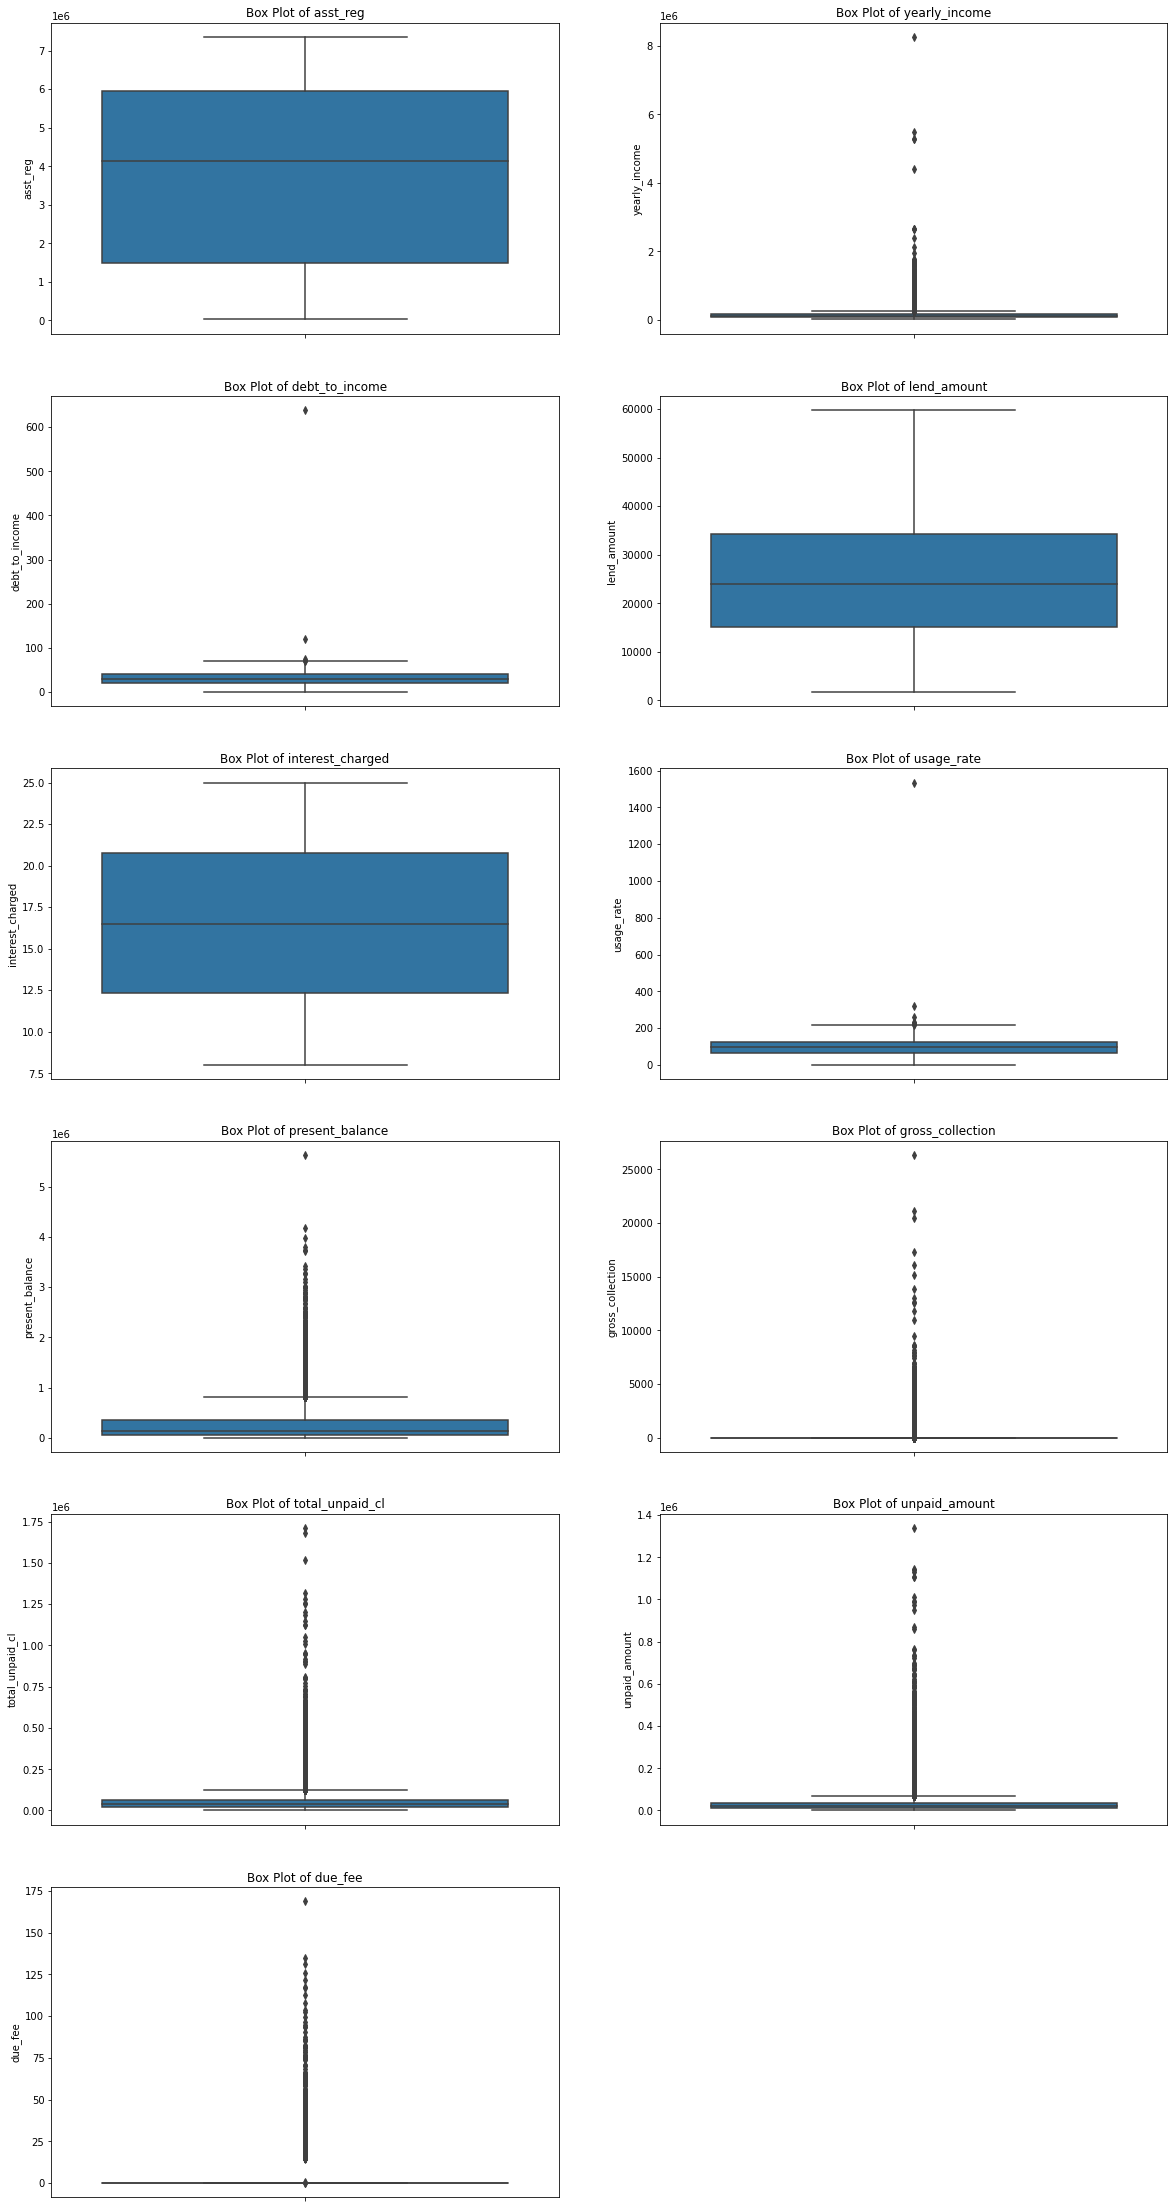

In [152]:
plt.figure(figsize=(20,40))
j=1
for i in num:
    plt.subplot(6,2,j);
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i);
    j=j+1

In [153]:
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
iqr=q3-q1
ur=q3+1.5*iqr
lr=q1-1.5*iqr
a=pd.DataFrame(df[num][(df[num]<lr)|(df[num]>ur)].count().sort_values(ascending=False),columns=['No. of Outliers'])
a['Percentage of Outliers']=a['No. of Outliers']/df.shape[0]*100
a = a.rename_axis(index='Feature')
round(a,1)

No. of Outliers  Percentage of Outliers
Feature                                                  
total_unpaid_cl              5266                     6.0
unpaid_amount                5165                     5.9
yearly_income                4215                     4.8
present_balance              2851                     3.3
gross_collection             1685                     1.9
due_fee                       989                     1.1
usage_rate                      8                     0.0
debt_to_income                  5                     0.0
asst_reg                        0                     0.0
lend_amount                     0                     0.0
interest_charged                0                     0.0

* As the presence of outliers does not influence the performance of the random forest model, let us not to treat the outliers.

### Data Preparation

In [154]:
df.head(10).T

0                    1  \
asst_reg                          421802              3964312   
gggrade                                1                    3   
experience                             3                    2   
validation                             2                    1   
yearly_income                   633600.0              85483.2   
home_status                     MORTGAGE                 RENT   
unpaid_2_years                         0                    0   
debt_to_income                   12.5496               9.0048   
lend_amount                     42023.25              38133.0   
deprecatory_records                    0                    0   
interest_charged                   15.39                 9.94   
usage_rate                        88.924              102.856   
inquiries                              2                    0   
present_balance                 607161.9            269234.06   
gross_collection                     0.0                  0.0   
sub_gggrade                            0                    1   
file_status                   fully paid                whole   
account_open                           0                    0   
total_unpaid_cl                  58598.0              18924.0   
duration                               0                    1   
unpaid_amount                   31216.05             11660.49   
reason               debt  consolidation  debt  consolidation   
claim_type                             I                    I   
due_fee                              0.0                  0.0   
loan_no_loan                           0                    0   

                                   2                3                    4  \
asst_reg                     4247560           197179              4646684   
gggrade                            2                2                    4   
experience                         0                0                    1   
validation                         1                2                    1   
yearly_income                79200.0          61600.0             68053.92   
home_status                     RENT             RENT                 RENT   
unpaid_2_years                     0                0                    0   
debt_to_income               24.9144          16.5816              40.0512   
lend_amount                  17100.0           5130.0              19665.0   
deprecatory_records                0                0                    0   
interest_charged               22.35            10.36                13.68   
usage_rate                    60.372          116.272               127.28   
inquiries                          0                1                    1   
present_balance             22476.53         15242.09             65433.94   
gross_collection                 0.0              0.0                  0.0   
sub_gggrade                        1                1                    2   
file_status                    whole       fully paid           fully paid   
account_open                       0                0                    0   
total_unpaid_cl              15604.0          22410.0              36022.0   
duration                           1                0                    1   
unpaid_amount                5637.87         15607.17             27472.86   
reason               major  purchase  major  purchase  debt  consolidation   
claim_type                         I                I                    I   
due_fee                          0.0              0.0                  0.0   
loan_no_loan                       0                1                    0   

                                       5                    6  \
asst_reg                         1771402              6308843   
gggrade                                1                    2   
experience                             1                    3   
validation                             1                   

* Let us label encode for the features like home status, file status and reason

In [155]:
for i in cat:
    if df[i].dtype == 'object': 
        df[i] = pd.Categorical(df[i]).codes

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asst_reg             87500 non-null  int64  
 1   gggrade              87500 non-null  int64  
 2   experience           87500 non-null  int64  
 3   validation           87500 non-null  int64  
 4   yearly_income        87500 non-null  float64
 5   home_status          87500 non-null  int8   
 6   unpaid_2_years       87500 non-null  int64  
 7   debt_to_income       87500 non-null  float64
 8   lend_amount          87500 non-null  float64
 9   deprecatory_records  87500 non-null  int64  
 10  interest_charged     87500 non-null  float64
 11  usage_rate           87500 non-null  float64
 12  inquiries            87500 non-null  int64  
 13  present_balance      87500 non-null  float64
 14  gross_collection     87500 non-null  float64
 15  sub_gggrade          87500 non-null 

* Now all the variables have numerical entries only and the data type is correctly identified. The dataset is cleaned and encoded. Now it can used for model building.

In [157]:
x=df.drop('loan_no_loan',axis=1)
y=df.loan_no_loan

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, test_size=0.25, random_state=1)

In [160]:
xtrain.head()

asst_reg  gggrade  experience  validation  yearly_income  home_status  \
24479   4235534        1           2           1      207680.00            4   
5941    6779882        2           1           1       92750.24            4   
4927     721120        1           3           2      155760.00            1   
72492   1263871        3           3           2      102080.00            1   
1997    6486623        3           3           1      229386.08            1   

       unpaid_2_years  debt_to_income  lend_amount  deprecatory_records  ...  \
24479               0         25.8384      47880.0                    0  ...   
5941                0         49.5096       6498.0                    0  ...   
4927                1         29.4504      59850.0                    0  ...   
72492               1         31.1472      34200.0                    0  ...   
1997                0         17.8080      34200.0                    0  ...   

       gross_collection  sub_gggrade  file_status  account_open  \
24479               0.0            0            0             0   
5941                0.0            1            1             0   
4927                0.0            0            0             0   
72492               0.0            1            0             0   
1997                0.0            1            1             0   

       total_unpaid_cl  duration  unpaid_amount  reason  claim_type  due_fee  
24479          39674.0         1       75371.67       1           0      0.0  
5941           68392.0         0       55995.66       2           0      0.0  
4927          177288.0         0       59008.68       2           0      0.0  
72492          31042.0         1       17506.98       3           0      0.0  
1997           70384.0         0       39596.76       2           0      0.0  

[5 rows x 24 columns]

In [161]:
xtest.head()

asst_reg  gggrade  experience  validation  yearly_income  home_status  \
49492   5770876        4           3           1      103840.00            1   
78961   6736033        2           1           0      344960.00            4   
10926   6499703        1           3           0       70400.00            3   
66911    777743        1           3           2      148140.96            1   
13226    853043        4           0           2      184800.00            1   

       unpaid_2_years  debt_to_income  lend_amount  deprecatory_records  ...  \
49492               0         21.3192      42750.0                    1  ...   
78961               1         25.5360      34200.0                    0  ...   
10926               0         53.1216       8550.0                    0  ...   
66911               0         25.2672      42750.0                    0  ...   
13226               0         43.1424      47880.0                    1  ...   

       gross_collection  sub_gggrade  file_status  account_open  \
49492               0.0            2            0             1   
78961               0.0            1            1             0   
10926               0.0            0            0             0   
66911               0.0            0            0             0   
13226            3620.8            2            0             0   

       total_unpaid_cl  duration  unpaid_amount  reason  claim_type  due_fee  
49492          27390.0         1        8011.35       2           0      0.0  
78961          60092.0         0       35520.12       2           0      0.0  
10926          41168.0         0       37635.39       1           0      0.0  
66911          28054.0         0       13753.53       2           0      0.0  
13226          47144.0         1       31357.98       3           0      0.0  

[5 rows x 24 columns]

In [162]:
ytrain.head()

24479    0
5941     0
4927     0
72492    0
1997     0
Name: loan_no_loan, dtype: int64

In [163]:
ytest.head()

49492    0
78961    0
10926    0
66911    0
13226    0
Name: loan_no_loan, dtype: int64

In [164]:
print('Size of the Predictors Train Dataset:',xtrain.shape)
print('Size of the Predictors Test Dataset:',ytrain.shape)
print('Size of the Target Train Dataset:',xtest.shape)
print('Size of the Target Test Dataset:',ytest.shape)

Size of the Predictors Train Dataset: (65625, 24)
Size of the Predictors Test Dataset: (65625,)
Size of the Target Train Dataset: (21875, 24)
Size of the Target Test Dataset: (21875,)


In [165]:
df.loan_no_loan.value_counts(normalize=True).round(4)*100

0    81.13
1    18.87
Name: loan_no_loan, dtype: float64

* Checking the Distribution of two classes in train and test sets of target variable

In [166]:
ytrain.value_counts(normalize=True).round(4)*100

0    81.11
1    18.89
Name: loan_no_loan, dtype: float64

In [167]:
ytest.value_counts(normalize=True).round(4)*100

0    81.19
1    18.81
Name: loan_no_loan, dtype: float64

Note
* From the above data, we can notice that the distribution classes in target variable is almost same in train and test datasets.

# Model Building - with Default Hyper Parameters

* Many models are bulit for this dataset in separate code files. But Random Forest Model has performed better for unseen test dataset. Hence, let us move forward with Random Forest Model.
* Let us build random forest model with default hyper parameters present in the algorithm

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve

In [169]:
rfm = RandomForestClassifier(random_state=1)

In [170]:
rfm.fit(xtrain,ytrain)

RandomForestClassifier(random_state=1)

In [171]:
ytrain_pred = rfm.predict(xtrain)

In [172]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53228
           1       1.00      1.00      1.00     12397

    accuracy                           1.00     65625
   macro avg       1.00      1.00      1.00     65625
weighted avg       1.00      1.00      1.00     65625



In [173]:
ytest_pred = rfm.predict(xtest)

In [174]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     17760
           1       0.69      0.25      0.36      4115

    accuracy                           0.84     21875
   macro avg       0.77      0.61      0.63     21875
weighted avg       0.82      0.84      0.80     21875



Insights
* From above classification reports, we can notice that the accuracy for the train dataset is much higher than that of test dataset. Hence, there is overfitting in the model.
* Let us tune hyperparameters to reduce the overfitting in the model.

#  Hyper Parameter Tuning

### Using GridsearchCV for Tuning Hyper Parameters in Random Forest Model

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
# param_grid = {
#       'max_depth': [13,14,15],
#     'max_features': [8,9,10],
#        'n_estimators': [151,201,251]}

In [177]:
param_grid = {
      'max_depth': [14],
    'max_features': [9],
       'n_estimators': [201]}
rfm = RandomForestClassifier(random_state=1)
gscv_rfm = GridSearchCV(estimator = rfm, param_grid = param_grid)

In [178]:
gscv_rfm.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [14], 'max_features': [9],
                         'n_estimators': [201]})

In [179]:
gscv_rfm.best_params_

{'max_depth': 14, 'max_features': 9, 'n_estimators': 201}

In [180]:
rfmf = gscv_rfm.best_estimator_

In [181]:
rfmf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=14, max_features=9, n_estimators=201,
                       random_state=1)

In [182]:
ytrain_pred = rfmf.predict(xtrain)

In [183]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     53228
           1       0.96      0.47      0.63     12397

    accuracy                           0.90     65625
   macro avg       0.92      0.73      0.78     65625
weighted avg       0.90      0.90      0.88     65625



In [184]:
ytest_pred = rfmf.predict(xtest)

In [185]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     17760
           1       0.70      0.26      0.38      4115

    accuracy                           0.84     21875
   macro avg       0.78      0.62      0.64     21875
weighted avg       0.82      0.84      0.81     21875



Insights
* From above classification reports, we can notice that the accuracy for the train dataset is comparable with that of test dataset. Hence, there is NO overfitting in the model.
* Let us use this model for predicting the default status of borrowers in unseen test dataset.

### Feature Importances

In [214]:
fi = pd.DataFrame(rfmf.feature_importances_,index=xtrain.columns,
columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False,key=abs).round(4)
fi

Feature_Importances
asst_reg                          0.4552
usage_rate                        0.0560
debt_to_income                    0.0551
present_balance                   0.0521
interest_charged                  0.0485
unpaid_amount                     0.0455
total_unpaid_cl                   0.0430
yearly_income                     0.0418
lend_amount                       0.0396
gross_collection                  0.0353
duration                          0.0211
file_status                       0.0189
reason                            0.0140
experience                        0.0112
inquiries                         0.0112
gggrade                           0.0112
validation                        0.0099
home_status                       0.0067
deprecatory_records               0.0062
sub_gggrade                       0.0062
unpaid_2_years                    0.0043
due_fee                           0.0038
account_open                      0.0031
claim_type                        0.0000

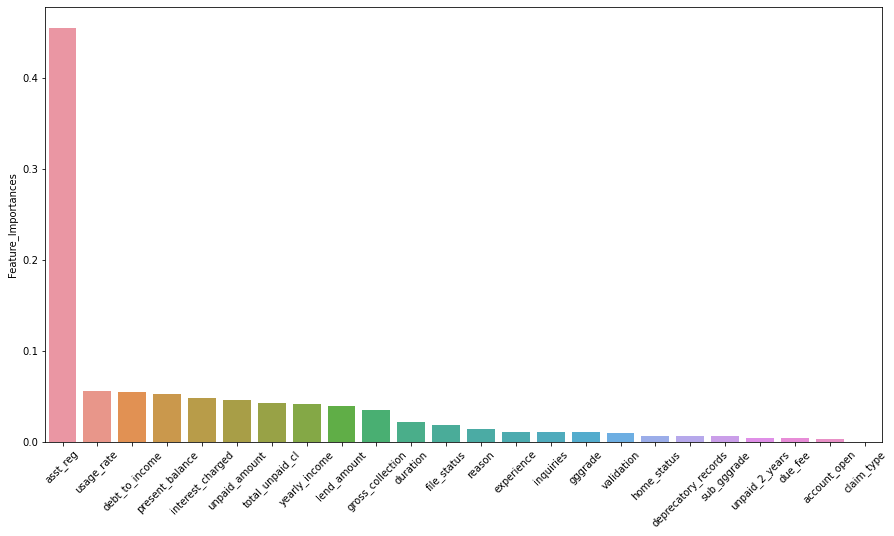

In [218]:
plt.figure(figsize=(15,8));
sns.barplot(fi.index,fi.Feature_Importances);
plt.xticks(rotation = 45);

From above plot, we can notice that assets registered, usage rate and debt to income ratio are the three most important variables to predict the target variable.

# Prediction on Unseen Test Dataset

In [187]:
test_original = pd.read_csv('Data_Test.csv')

In [188]:
test_original.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified      140800.00   
1  167688   5298273      II     >10yrs            Vfied      146080.00   
2  198768    189781      VI     >10yrs            Vfied      202222.24   
3  192564   1530906      II     >10yrs            Vfied      105600.00   
4  151199   4410316     III       4yrs        Not Vfied      151360.00   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   ...  Sub GGGrade  File Status       State  Account Open  Total Unpaid CL  \
0  ...           17   fully paid  California            23          33532.0   
1  ...           19        whole     Florida            17         149234.0   
2  ...           37        whole          NM            15          70218.0   
3  ...           19   fully paid          DE            18          79182.0   
4  ...           25   fully paid     Florida             7          13612.0   

   Duration  Unpaid Amount               Reason  Claim Type  Due Fee  
0   3 years       15755.94      major  purchase           I      0.0  
1   5 years       68237.55  debt  consolidation           I      0.0  
2   5 years       66272.76  debt  consolidation           I      0.0  
3   3 years       15595.20         credit  card           I      0.0  
4   3 years        8850.96  debt  consolidation           I      0.0  

[5 rows x 29 columns]

In [189]:
test = test_original.drop(['ID','Postal Code'],axis=1)

In [190]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             37500 non-null  int64  
 1   GGGrade              37500 non-null  object 
 2   Experience           37500 non-null  object 
 3   Validation           37500 non-null  object 
 4   Yearly Income        35075 non-null  float64
 5   Home Status          37500 non-null  object 
 6   Unpaid 2 years       37500 non-null  int64  
 7   Already Defaulted    37500 non-null  int64  
 8   Designation          36914 non-null  object 
 9   Debt to Income       35989 non-null  float64
 10  Lend Amount          37500 non-null  float64
 11  Deprecatory Records  37500 non-null  int64  
 12  Interest Charged     37500 non-null  float64
 13  Usage Rate           37500 non-null  float64
 14  Inquiries            37500 non-null  int64  
 15  Present Balance      37500 non-null 

In [191]:
test.columns = [str(x).lower() for x in test.columns]

In [192]:
test.columns = test.columns.str.replace(' ','_')

In [193]:
test.columns = test.columns.str.replace('/','_')

In [194]:
test.drop(['designation','state','already_defaulted'],axis=1,inplace=True)

In [195]:
for i in cat:
    print('Feature:',i)
    display(pd.DataFrame(test[i].value_counts()))
    print('-------------------------------')

Feature: gggrade


gggrade
III    10682
II     10539
I       6129
IV      5858
V       3098
VI       963
VII      231

-------------------------------
Feature: experience


experience
>10yrs       13159
2yrs          3412
3yrs          3128
<1yr          3102
1yrs          2443
5yrs          2412
4yrs          2239
8yrs          2144
7yrs          1969
6yrs          1857
9yrs          1635

-------------------------------
Feature: validation


validation
Source Verified       14646
Not Vfied             11488
Vfied                 11366

-------------------------------
Feature: home_status


home_status
MOR??AGE        18912
REN?            14992
OWN              3592
NONE                2
OTHER               2

-------------------------------
Feature: unpaid_2_years


unpaid_2_years
0            29916
1             4966
2             1501
3              542
4              274
5              124
6               82
7               43
8               23
10               8
9                8
12               4
13               2
17               2
11               2
15               1
14               1
18               1

-------------------------------
Feature: deprecatory_records


deprecatory_records
0                 31564
1                  4982
2                   635
3                   183
4                    69
5                    32
6                    18
7                     7
8                     3
9                     2
21                    1
11                    1
12                    1
13                    1
10                    1

-------------------------------
Feature: inquiries


inquiries
0      21249
1      10197
2       3865
3       1539
4        458
5        154
6         38

-------------------------------
Feature: sub_gggrade


sub_gggrade
18         2337
19         2277
21         2272
22         2241
23         2240
24         2145
20         2009
17         1975
16         1941
15         1911
25         1784
26         1554
14         1338
27         1263
28         1112
29         1044
11          990
12          963
13          927
30          885
32          799
31          786
33          565
34          536
35          412
36          305
37          250
38          181
39          133
40           94
41           75
42           63
43           46
44           27
45           20

-------------------------------
Feature: file_status


file_status
whole             19954
fully paid        17546

-------------------------------
Feature: account_open


account_open
11          3302
10          3300
9           3242
12          3024
13          2819
8           2752
14          2500
7           2234
15          2133
16          1676
6           1557
17          1486
18          1231
19           972
5            899
20           797
21           658
22           479
23           420
24           331
4            320
25           301
26           218
27           149
28           130
29            88
30            83
3             75
31            61
33            52
32            45
34            35
35            27
36            23
37            19
41            10
38            10
39             9
40             6
49             4
44             4
2              3
43             3
46             3
52             3
42             2
51             1
54             1
60             1
48             1
47             1

-------------------------------
Feature: duration


duration
3 years     25809
5 years     11691

-------------------------------
Feature: reason


reason
debt  consolidation   22463
credit  card           9054
home  improvement      2157
other                  1694
major  purchase         607
medical                 334
small  business         304
car                     301
moving                  219
vacation                169
house                   136
wedding                  42
renewable  energy        20

-------------------------------
Feature: claim_type


claim_type
I       37480
J          20

-------------------------------


In [196]:
test.gggrade = test.gggrade.replace([ 'I','II', 'III', 'IV'],[0,1,2,3])
test.gggrade = test.gggrade.replace(['V', 'VI', 'VII'],4)

In [197]:
test.experience = test.experience.replace('<1yr',0)
test.experience = test.experience.replace(['1yrs', '2yrs', '3yrs', '4yrs','5yrs'],1)
test.experience = test.experience.replace(['6yrs', '7yrs',  '8yrs', '9yrs'],2)
test.experience = test.experience.replace('>10yrs',3)

In [198]:
test.validation = test.validation.replace(['Vfied', 'Source Verified', 'Not Vfied'],[2,1,0])

In [199]:
test.home_status = np.where(test.home_status=='NONE','MOR??AGE',test.home_status)

In [200]:
test.unpaid_2_years = np.where(test.unpaid_2_years>0,1,test.unpaid_2_years)

In [201]:
test.deprecatory_records = test.deprecatory_records.replace([4,5,6,7],4)
test.deprecatory_records = np.where(test.deprecatory_records>7,5,test.deprecatory_records)

In [202]:
test.inquiries = test.inquiries.replace([2,3,4],2)
test.inquiries = np.where(test.inquiries>4,3,test.inquiries)

In [203]:
test.sub_gggrade = np.where(test.sub_gggrade<21,0,test.sub_gggrade)
test.sub_gggrade = np.where((test.sub_gggrade>20)&(test.sub_gggrade<31),1,test.sub_gggrade)
test.sub_gggrade = np.where(test.sub_gggrade>30,2,test.sub_gggrade)

In [204]:
test.account_open = np.where(test.account_open<21,0,test.account_open)
test.account_open = np.where((test.account_open>20)&(test.account_open<37),1,test.account_open)
test.account_open = np.where(test.account_open>36,2,test.account_open)

In [205]:
test.duration = test.duration.replace(['3 years', '5 years'],[0,1])

In [206]:
for i in cat:
    if test[i].dtype == 'object': 
        test[i] = pd.Categorical(test[i]).codes

In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asst_reg             37500 non-null  int64  
 1   gggrade              37500 non-null  int64  
 2   experience           37500 non-null  int64  
 3   validation           37500 non-null  int64  
 4   yearly_income        35075 non-null  float64
 5   home_status          37500 non-null  int8   
 6   unpaid_2_years       37500 non-null  int64  
 7   debt_to_income       35989 non-null  float64
 8   lend_amount          37500 non-null  float64
 9   deprecatory_records  37500 non-null  int64  
 10  interest_charged     37500 non-null  float64
 11  usage_rate           37500 non-null  float64
 12  inquiries            37500 non-null  int64  
 13  present_balance      37500 non-null  float64
 14  gross_collection     37500 non-null  float64
 15  sub_gggrade          37500 non-null 

In [208]:
for i in num:
    test[i]=test[i].fillna(test[i].median())

In [209]:
pred_rfmf = rfmf.predict(test)
pred_rfmf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [210]:
prob = rfmf.predict_proba(test)[:,1]
prob

array([0.2917389 , 0.06001971, 0.33047935, ..., 0.35086482, 0.17228124,
       0.16876145])

In [211]:
pred_rfmf1 = np.where(prob>0.2258,1,0)

In [212]:
submission_rfmf = pd.DataFrame({'ID': test_original.ID, 'Loan/No Loan':pred_rfmf1})
submission_rfmf[0:10]

ID  Loan/No Loan
0  198980             1
1  167688             0
2  198768             1
3  192564             1
4  151199             0
5  170276             0
6  218649             0
7  202745             0
8  202968             0
9  182536             0

In [213]:
submission_rfmf.to_csv('submission_rfmf.csv',index = False)